In [1]:
import CalcLoadPlotData as clp
import h5py
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

In [2]:
UnitVelocity_in_cm_per_s = 1e5		
UnitVelocity_in_km_per_s = UnitVelocity_in_cm_per_s / 1e5
UnitLength_in_cm = 3.085678e21 	# kpc---------------------------
UnitLength_in_pc = UnitLength_in_cm / 3.085678e18
UnitLength_in_kpc = UnitLength_in_pc / 1000
UnitMass_in_g = 1.989e43		# 1e10 solar masses-------------
UnitMass_in_Msun = UnitMass_in_g / 1.989e33

UnitDensity_in_cgs = UnitMass_in_g / UnitLength_in_cm**3

g_to_Msun = 1 / 1.989e33
yr_to_sec = 60 * 60 * 24 * 365
sec_to_yr = 1 / yr_to_sec
cm_to_km = 1 / 1e5
cm_to_pc = 1 / 3.085678e18
UnitEnergy_in_erg = UnitMass_in_g * UnitVelocity_in_cm_per_s**2
UnitTime_in_s = UnitLength_in_cm / UnitVelocity_in_cm_per_s
UnitTime_in_yr = UnitTime_in_s * sec_to_yr
UnitMass_in_Msun = UnitMass_in_g * g_to_Msun

m_p = 1.67e-24 # proton mass in g


clp.GetUnitSystem()
clp.SetUnitSystem(UnitVelocity_in_cm_per_s,UnitLength_in_cm,UnitMass_in_g)
clp.GetUnitSystem()

UnitVelocity_in_cm_per_s = 100000.0 
UnitLength_in_cm = 3.085678e+18 
UnitMass_in_g = 1.989e+31
UnitVelocity_in_cm_per_s = 100000.0 
UnitLength_in_cm = 3.085678e+21 
UnitMass_in_g = 1.989e+43


In [3]:
galaxyFolderPath = "/vera/ptmp/gc/xboecker/run/4_galaxy/xeno_diskIC/run_diskIC_wdm/runs_settled_no_refinement_ICs/"


galaxyFolderNames = ["noSNe_10x", "fE_10x", "fM_10x", "sE_10x_new", "sM_10x_new"]
#galaxyFolderNames = ["fE_10x"]
galaxyFolderNames = ["noSNe_10x", "fE_10x", "fM_10x", "sE_10x_new_boost_10", "sM_10x_new_boost_10"]

#galaxyFolderNames = ["noSNe_1x", "fE_1x", "fM_1x", "sE_1x_new_boost_10", "sM_1x_new_boost_10"]

#galaxyFolderNames = ["noSNe_0_1x", "fE_0_1x", "fM_0_1x", "sE_0_1x_new_boost_10", "sM_0_1x_new_boost_10"]

#galaxyFolderNames = ["sM_10x_new_boost_10", "sM_1x_new_boost_10"]

#galaxyFolderNames = ["noSNe_0_1x", "noSNe_1x", "noSNe_10x"]
#galaxyFolderNames = ["fE_0_1x", "fE_1x", "fE_10x"]
#galaxyFolderNames = ["fM_0_1x", "fM_1x", "fM_10x"]
#galaxyFolderNames = ["sE_0_1x_new_boost_10", "sE_1x_new_boost_10", "sE_10x_new_boost_10"]
#galaxyFolderNames = ["sM_0_1x_new_boost_10", "sM_1x_new_boost_10", "sM_10x_new_boost_10"]


#galaxyFolderNames = ["output_cooling_SFR"]
#galaxyDataFolders[0] = "/vera/ptmp/gc/xboecker/run/4_galaxy/xeno_diskIC/run_diskIC_wdm/output_cooling_SFR"

#galaxyFolderPath = "/vera/ptmp/gc/xboecker/run/4_galaxy/xeno_diskIC/run_diskIC_wdm/"
#galaxyFolderNames = ["ICs_1x_settled_no_refinement_no_outflow", "ICs_10x_settled_no_refinement_no_outflow", "ICs_100x_settled_no_refinement_no_outflow"]

#galaxyFolderNames = ["fE_10x", "fM_10x", "sE_10x", "sE_10x_boost_10", "sE_10x_boost_50", "sM_10x", "sM_10x_boost_10", "sM_10x_boost_50"]
galaxyDataFolders = np.full(len(galaxyFolderNames),"string long enough so that no entry will be longer than this, because then is would be cut off......................................................................................")

for i in range(len(galaxyFolderNames)):
    galaxyDataFolders[i] = galaxyFolderPath+galaxyFolderNames[i]
    

galaxyBoxSize = 200
galaxyFrameAmount = 301
galaxyFrameNbrMultiplier = 1
TimeBetSnapshot_in_unit_time = 0.01 # ----------

In [19]:
kB_SI = 1.38e-23 #J/K
kB_cgs = kB_SI * 1e7
X_H = 0.76 # hydrogen mass fraction
gamma = 5/3
m_p = 1.67e-24 # proton mass in g

def T(internalEnergy, electronAbundance): #input in codeunits output in Kelvin
    x_e = electronAbundance
    u = internalEnergy
    
    print(x_e)
    my = 4/(1 + 3 * X_H + 4 * X_H * x_e) * m_p # meanMolecularWeight
    T = (gamma - 1) * u / kB_cgs * UnitEnergy_in_erg / UnitMass_in_g * my
    return T

def getTemperaturesInKelvin(folder, timeStep, debugOn = False):
    energies = clp.LoadDataFromHDF(folder, timeStep, "InternalEnergy")
    electronAbundance = clp.LoadDataFromHDF(folder, timeStep, "ElectronAbundance")
    
    temperatures = T(energies, electronAbundance)
    
    if(timeStep == 0):
        print("initial temperature: " + str(temperatures[0]) + "K")
    if(debugOn):
        print("max temp: " + str(np.max(temperatures)))
        print("min temp: " + str(np.min(temperatures)))
    
    return temperatures

def PlotDensityTempPhaseDiagramm(folder, timeStep, savePath):
    densities = clp.getDensities(folder, timeStep)*UnitDensity_in_cgs /m_p
    temperatures = getTemperaturesInKelvin(folder, timeStep)
    masses = clp.getMasses(folder, timeStep) * UnitMass_in_Msun
    radDistances = clp.getRadialDistances(folder, timeStep) * UnitLength_in_kpc
    diskDensities = densities[np.where(radDistances < 20)]
    diskTemperatures = temperatures[np.where(radDistances < 20)]

    print(np.min(densities))
    print(np.max(densities))
    print(np.min(temperatures))
    print(np.max(temperatures))
    fig, ax = plt.subplots(1,1, figsize=(13,8))
    
    hist = ax.hist2d(np.log10(densities), np.log10(temperatures), weights=masses, bins=400, norm = mpl.colors.LogNorm(), range=[[-8,1],[0,9]])
    ax.set_xlabel("density [log10(cm-3)]")
    ax.set_ylabel("temperature [log10(K)]")
    cbar = plt.colorbar(hist[3])
    cbar.set_label('gas mass [$M_\odot$]')
    
    plt.title("")
    filename = savePath + 'frame_%03d.png' % timeStep
    fig.savefig(filename)
    plt.show()
    plt.close(fig)
    
    
savePath = "/vera/u/xboecker/jupyterNotebooksOutputs/plots/Galaxy/phaseDiagrams/sE_10x_boost_10/"

PlotDensityTempPhaseDiagramm(galaxyDataFolders[3], 300, savePath)


#for f in range(len(galaxyFolderNames)-1):
#    dh = display(0,display_id=True)
#    for i in range(galaxyFrameAmount):
#        clp.PlotDensityTempPhaseDiagramm(galaxyDataFolders[f], i, galaxyBoxSize, savePath + saveFolders[f])
#        dh.update(i)
#

[1.0544119 1.1009353 1.1006682 ... 1.1578932 1.1578935 1.157894 ]
1.4223102e-07
8.855344
4137.048702158258
20255253.828984633


In [2]:
scale = 0.05
avgMass = 1#0.36

def integral(m1, m2, exp):
    return ((1/(exp+1) * m2 ** (exp+1)) - (1/(exp+1) * m1 ** (exp+1))) / scale * avgMass

def intLow(m1, m2):
    exp = -0.3
    return integral(m1, m2, exp)

def intMed(m1, m2):
    exp = -1.3
    return integral(m1, m2, exp)

def intHigh(m1, m2):
    exp = -2.3
    return integral(m1, m2, exp)

print(intLow(0, 0.08))
print(intMed(0.08, 0.5))
print(intHigh(0.5, 10000))

print(intLow(0, 0.08) + intMed(0.08, 0.5) + intHigh(0.5, 10000))
print(intHigh(8, 10000))

4.8763508645102664
60.15060599188839
37.88126949409828
102.90822635049693
1.0304543359242087


load data
load data
load data
load data
load data
[0.00000000e+00 9.78462075e+06 1.95692415e+07 2.93538623e+07
 3.91384830e+07 4.89231038e+07 5.87077245e+07 6.84923453e+07
 7.82769660e+07 8.80615868e+07 9.78462075e+07 1.07630828e+08
 1.17415449e+08 1.27200070e+08 1.36984691e+08 1.46769311e+08
 1.56553932e+08 1.66338553e+08 1.76123174e+08 1.85907794e+08
 1.95692415e+08 2.05477036e+08 2.15261657e+08 2.25046277e+08
 2.34830898e+08 2.44615519e+08 2.54400140e+08 2.64184760e+08
 2.73969381e+08 2.83754002e+08 2.93538623e+08 3.03323243e+08
 3.13107864e+08 3.22892485e+08 3.32677106e+08 3.42461726e+08
 3.52246347e+08 3.62030968e+08 3.71815589e+08 3.81600209e+08
 3.91384830e+08 4.01169451e+08 4.10954072e+08 4.20738692e+08
 4.30523313e+08 4.40307934e+08 4.50092555e+08 4.59877175e+08
 4.69661796e+08 4.79446417e+08 4.89231038e+08 4.99015658e+08
 5.08800279e+08 5.18584900e+08 5.28369521e+08 5.38154141e+08
 5.47938762e+08 5.57723383e+08 5.67508004e+08 5.77292624e+08
 5.87077245e+08 5.96861866e+08 6.06

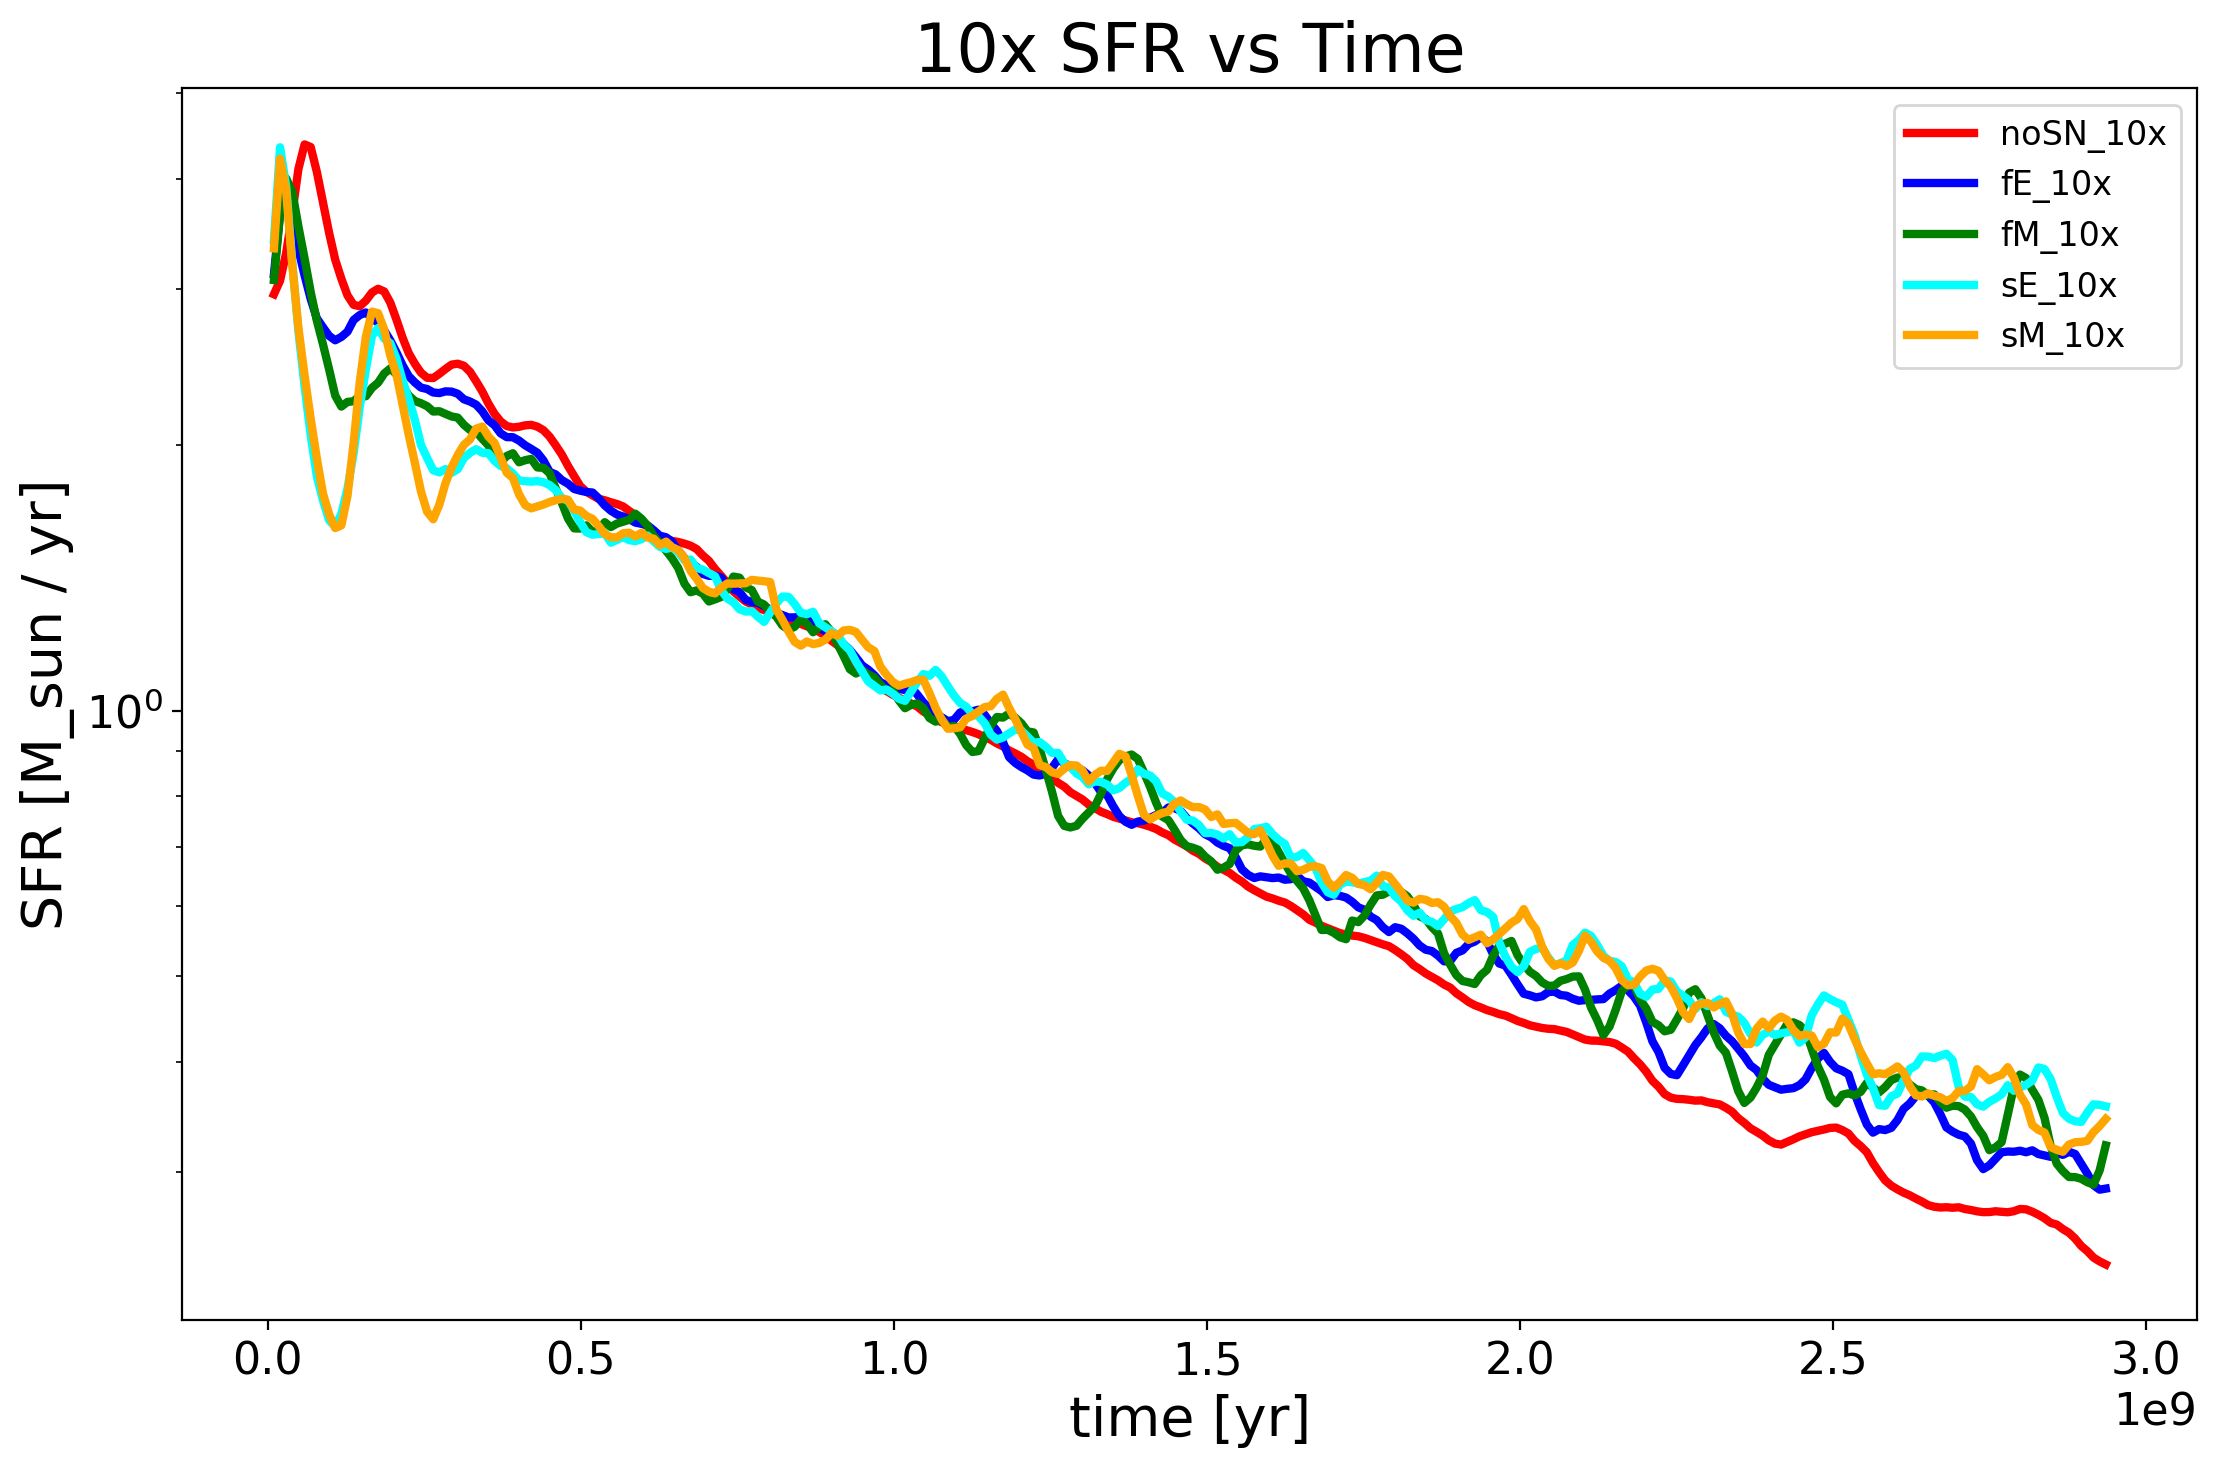

In [46]:
sfrArray = np.full((len(galaxyFolderNames), galaxyFrameAmount), 0, dtype = np.float64)

for i in range(len(galaxyFolderNames)):
    sfrArray[i] = clp.calculateOrLoadData(folder = galaxyDataFolders[i], 
                                        folderName = galaxyFolderNames[i], 
                                        dataName = "SFR", 
                                        calcDataOfOneSnapShotFunction = clp.getTotalSFR, 
                                        frameAmount = galaxyFrameAmount, 
                                        recalculate = False)



clp.PlotData(data = sfrArray, 
         folderNames = galaxyFolderNames, 
         title = "10x SFR vs Time", 
         ylabel = "SFR [M_sun / yr]", 
         dataName = "SFR", 
         unit_conversion_factor = 1,
         frameAmount = galaxyFrameAmount, 
         frameNbrMultiplier = galaxyFrameNbrMultiplier,
         TimeBetSnapshot_in_unit_time = TimeBetSnapshot_in_unit_time,
         legendLabels = ["noSN_10x", "fE_10x", "fM_10x", "sE_10x", "sM_10x"],
         compareToAnalyticRadius = False)

In [4]:
def getStarCoos(folder, timeStep):
    with h5py.File(folder+"/snap_"+str(timeStep).zfill(3) +".hdf5", "r") as hdf:
        if "PartType4" not in hdf:
            return np.zeros(1)
        StarsExploded = np.array(hdf.get("PartType4/StarsExploded"))
        indices = np.where(StarsExploded == 0)
        coos = np.array(hdf.get("PartType4/Coordinates"))[indices]
    return coos, indices

IndexError: index 122118 is out of bounds for axis 0 with size 121526

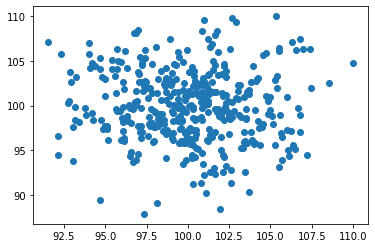

In [26]:
timeStep = 100
folder = galaxyDataFolders[2]
dataName = "Coordinates"
partType = "PartType4"

starCoos, indices = getStarCoos(folder, timeStep)
plt.scatter(starCoos[:,0], starCoos[:,1])

with h5py.File(folder+"/snap_"+str(timeStep-1).zfill(3) +".hdf5", "r") as hdf:
        coos = np.array(hdf.get("PartType4/Coordinates"))[indices]
        plt.scatter(coos[:,0], coos[:,1])

#### Outflows

load data
load data
load data
load data
load data
[0.00000000e+00 9.78462075e+06 1.95692415e+07 2.93538623e+07
 3.91384830e+07 4.89231038e+07 5.87077245e+07 6.84923453e+07
 7.82769660e+07 8.80615868e+07 9.78462075e+07 1.07630828e+08
 1.17415449e+08 1.27200070e+08 1.36984691e+08 1.46769311e+08
 1.56553932e+08 1.66338553e+08 1.76123174e+08 1.85907794e+08
 1.95692415e+08 2.05477036e+08 2.15261657e+08 2.25046277e+08
 2.34830898e+08 2.44615519e+08 2.54400140e+08 2.64184760e+08
 2.73969381e+08 2.83754002e+08 2.93538623e+08 3.03323243e+08
 3.13107864e+08 3.22892485e+08 3.32677106e+08 3.42461726e+08
 3.52246347e+08 3.62030968e+08 3.71815589e+08 3.81600209e+08
 3.91384830e+08 4.01169451e+08 4.10954072e+08 4.20738692e+08
 4.30523313e+08 4.40307934e+08 4.50092555e+08 4.59877175e+08
 4.69661796e+08 4.79446417e+08 4.89231038e+08 4.99015658e+08
 5.08800279e+08 5.18584900e+08 5.28369521e+08 5.38154141e+08
 5.47938762e+08 5.57723383e+08 5.67508004e+08 5.77292624e+08
 5.87077245e+08 5.96861866e+08 6.06

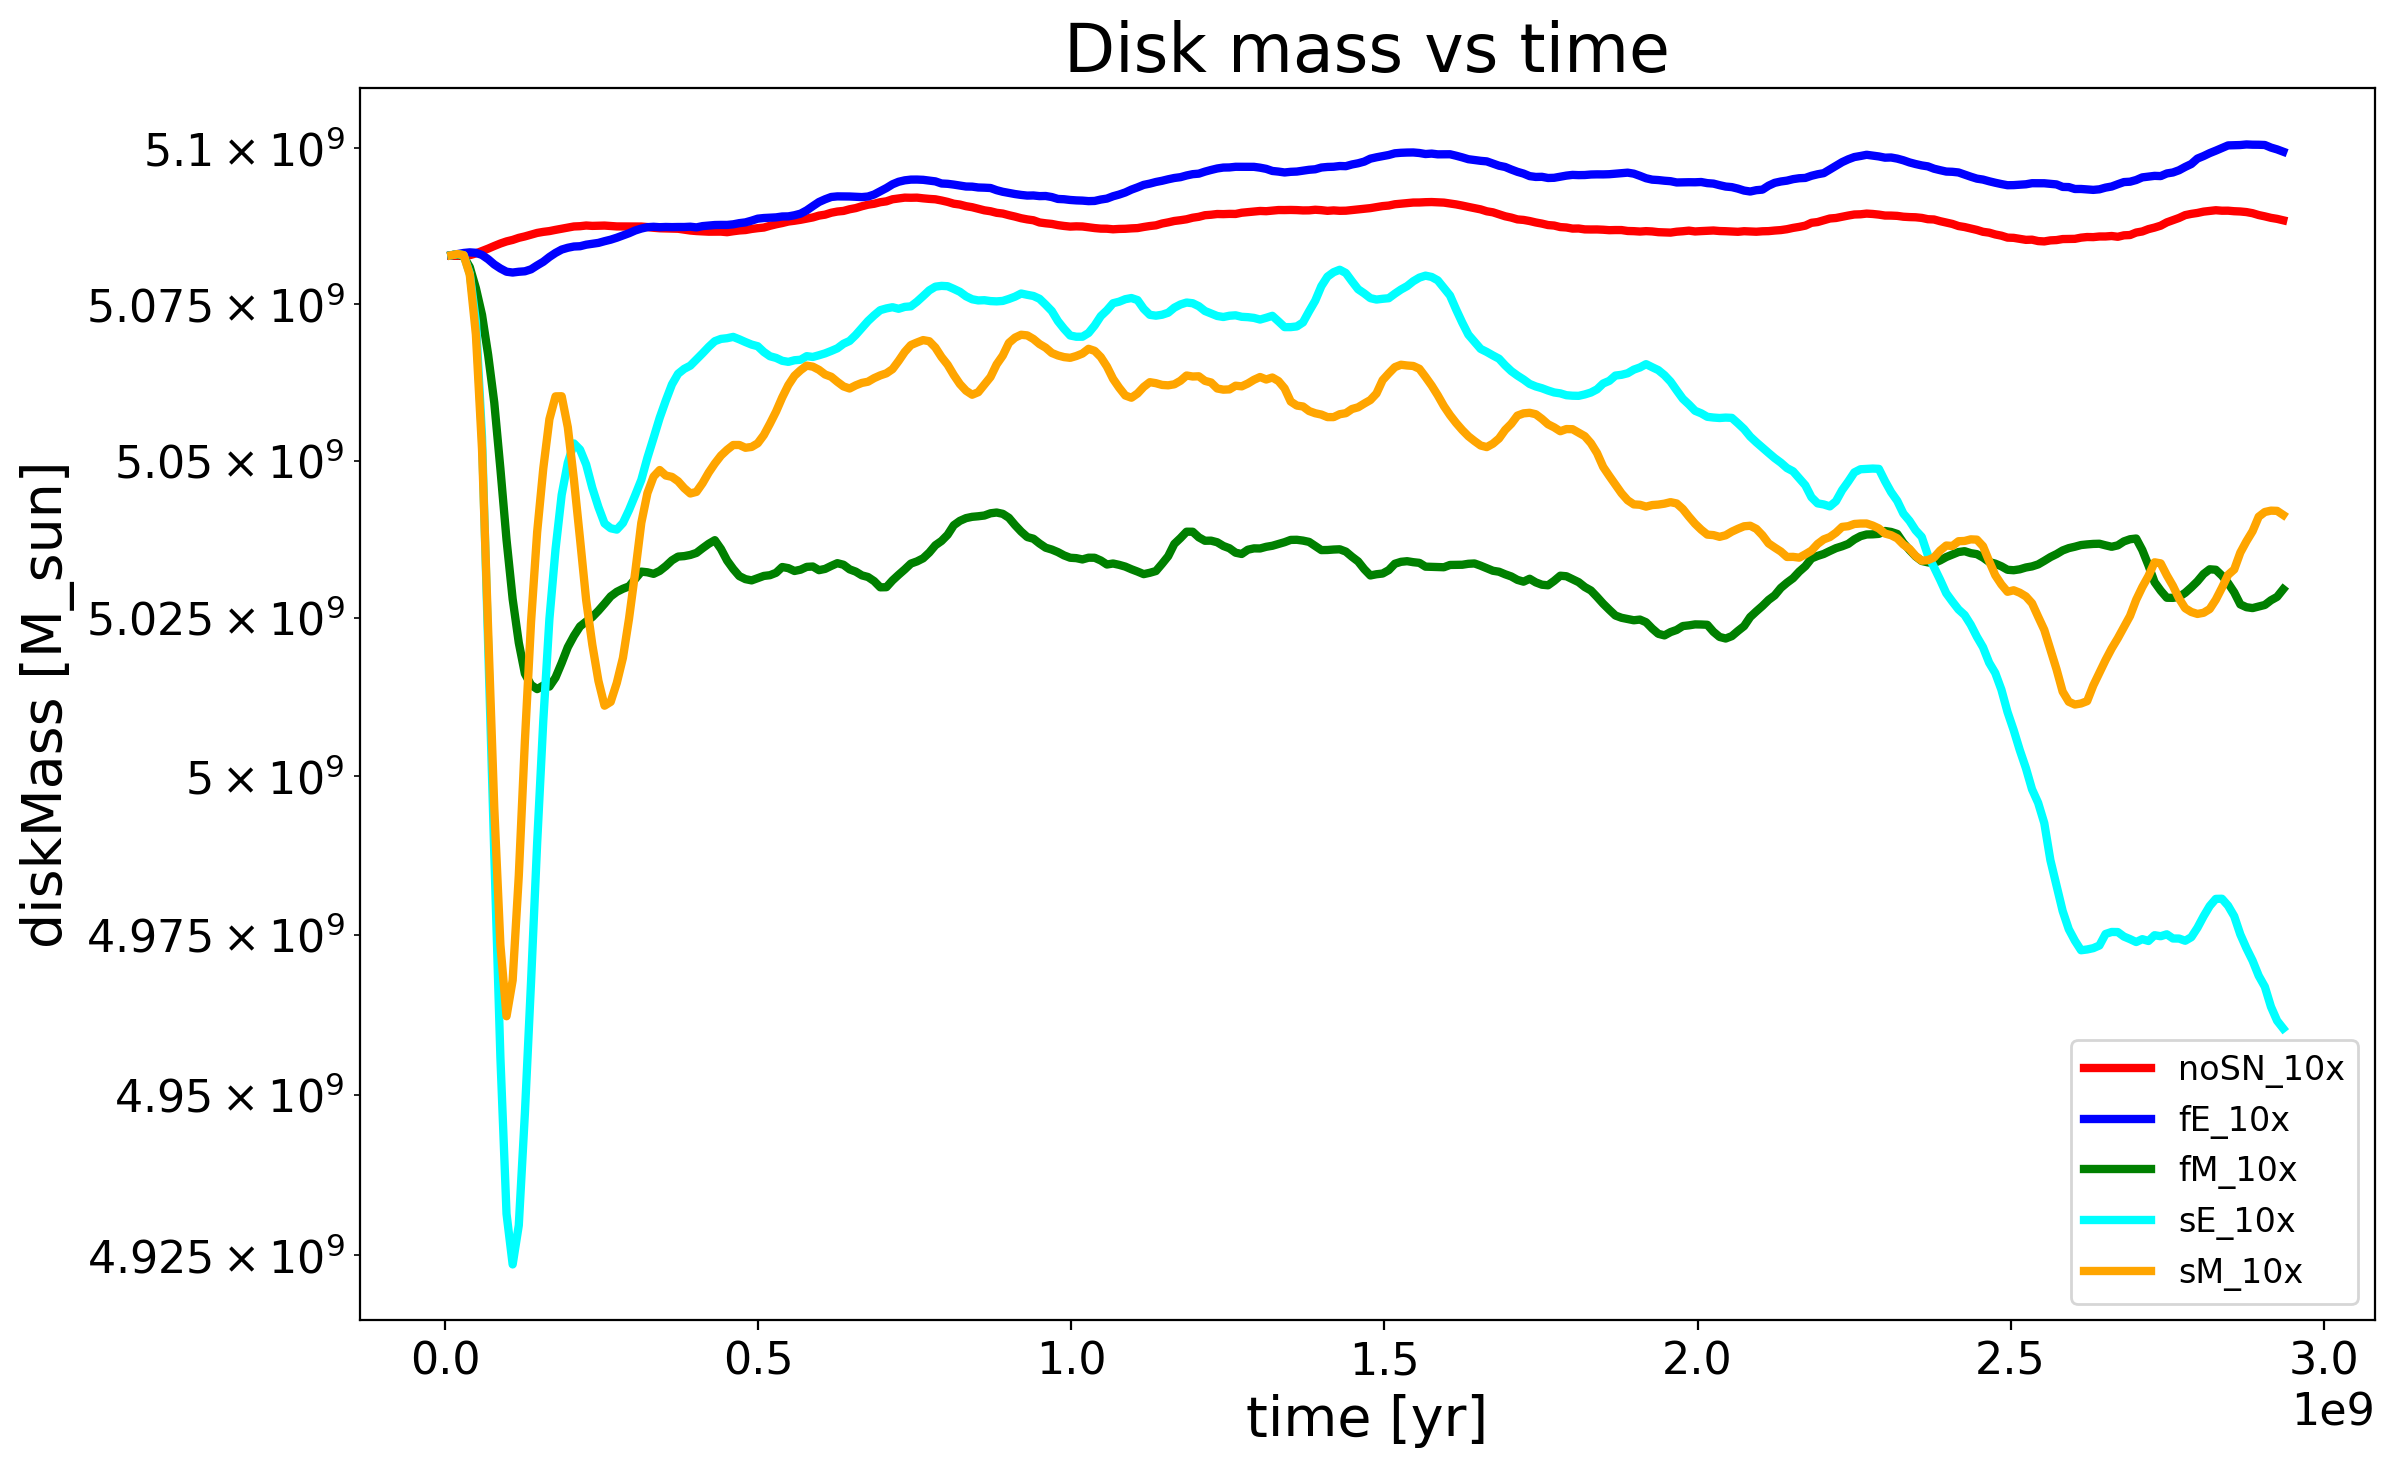

In [39]:
diskMassArray = np.full((len(galaxyFolderNames), galaxyFrameAmount), 0, dtype = np.float64)

for i in range(len(galaxyFolderNames)):
    diskMassArray[i] = clp.calculateOrLoadData(folder = galaxyDataFolders[i], 
                                        folderName = galaxyFolderNames[i], 
                                        dataName = "diskMass", 
                                        calcDataOfOneSnapShotFunction = clp.getTotalDiskMass, 
                                        frameAmount = galaxyFrameAmount, 
                                        recalculate = False)
    


clp.PlotData(data = diskMassArray, 
         folderNames = galaxyFolderNames, 
         title = "Disk mass vs time", 
         ylabel = "diskMass [M_sun]", 
         dataName = "diskMass", 
         unit_conversion_factor = UnitMass_in_Msun,
         frameAmount = galaxyFrameAmount, 
         frameNbrMultiplier = galaxyFrameNbrMultiplier,
         TimeBetSnapshot_in_unit_time = TimeBetSnapshot_in_unit_time,
         legendLabels = ["noSN_10x", "fE_10x", "fM_10x", "sE_10x", "sM_10x"],
         compareToAnalyticRadius = False)

load data
load data


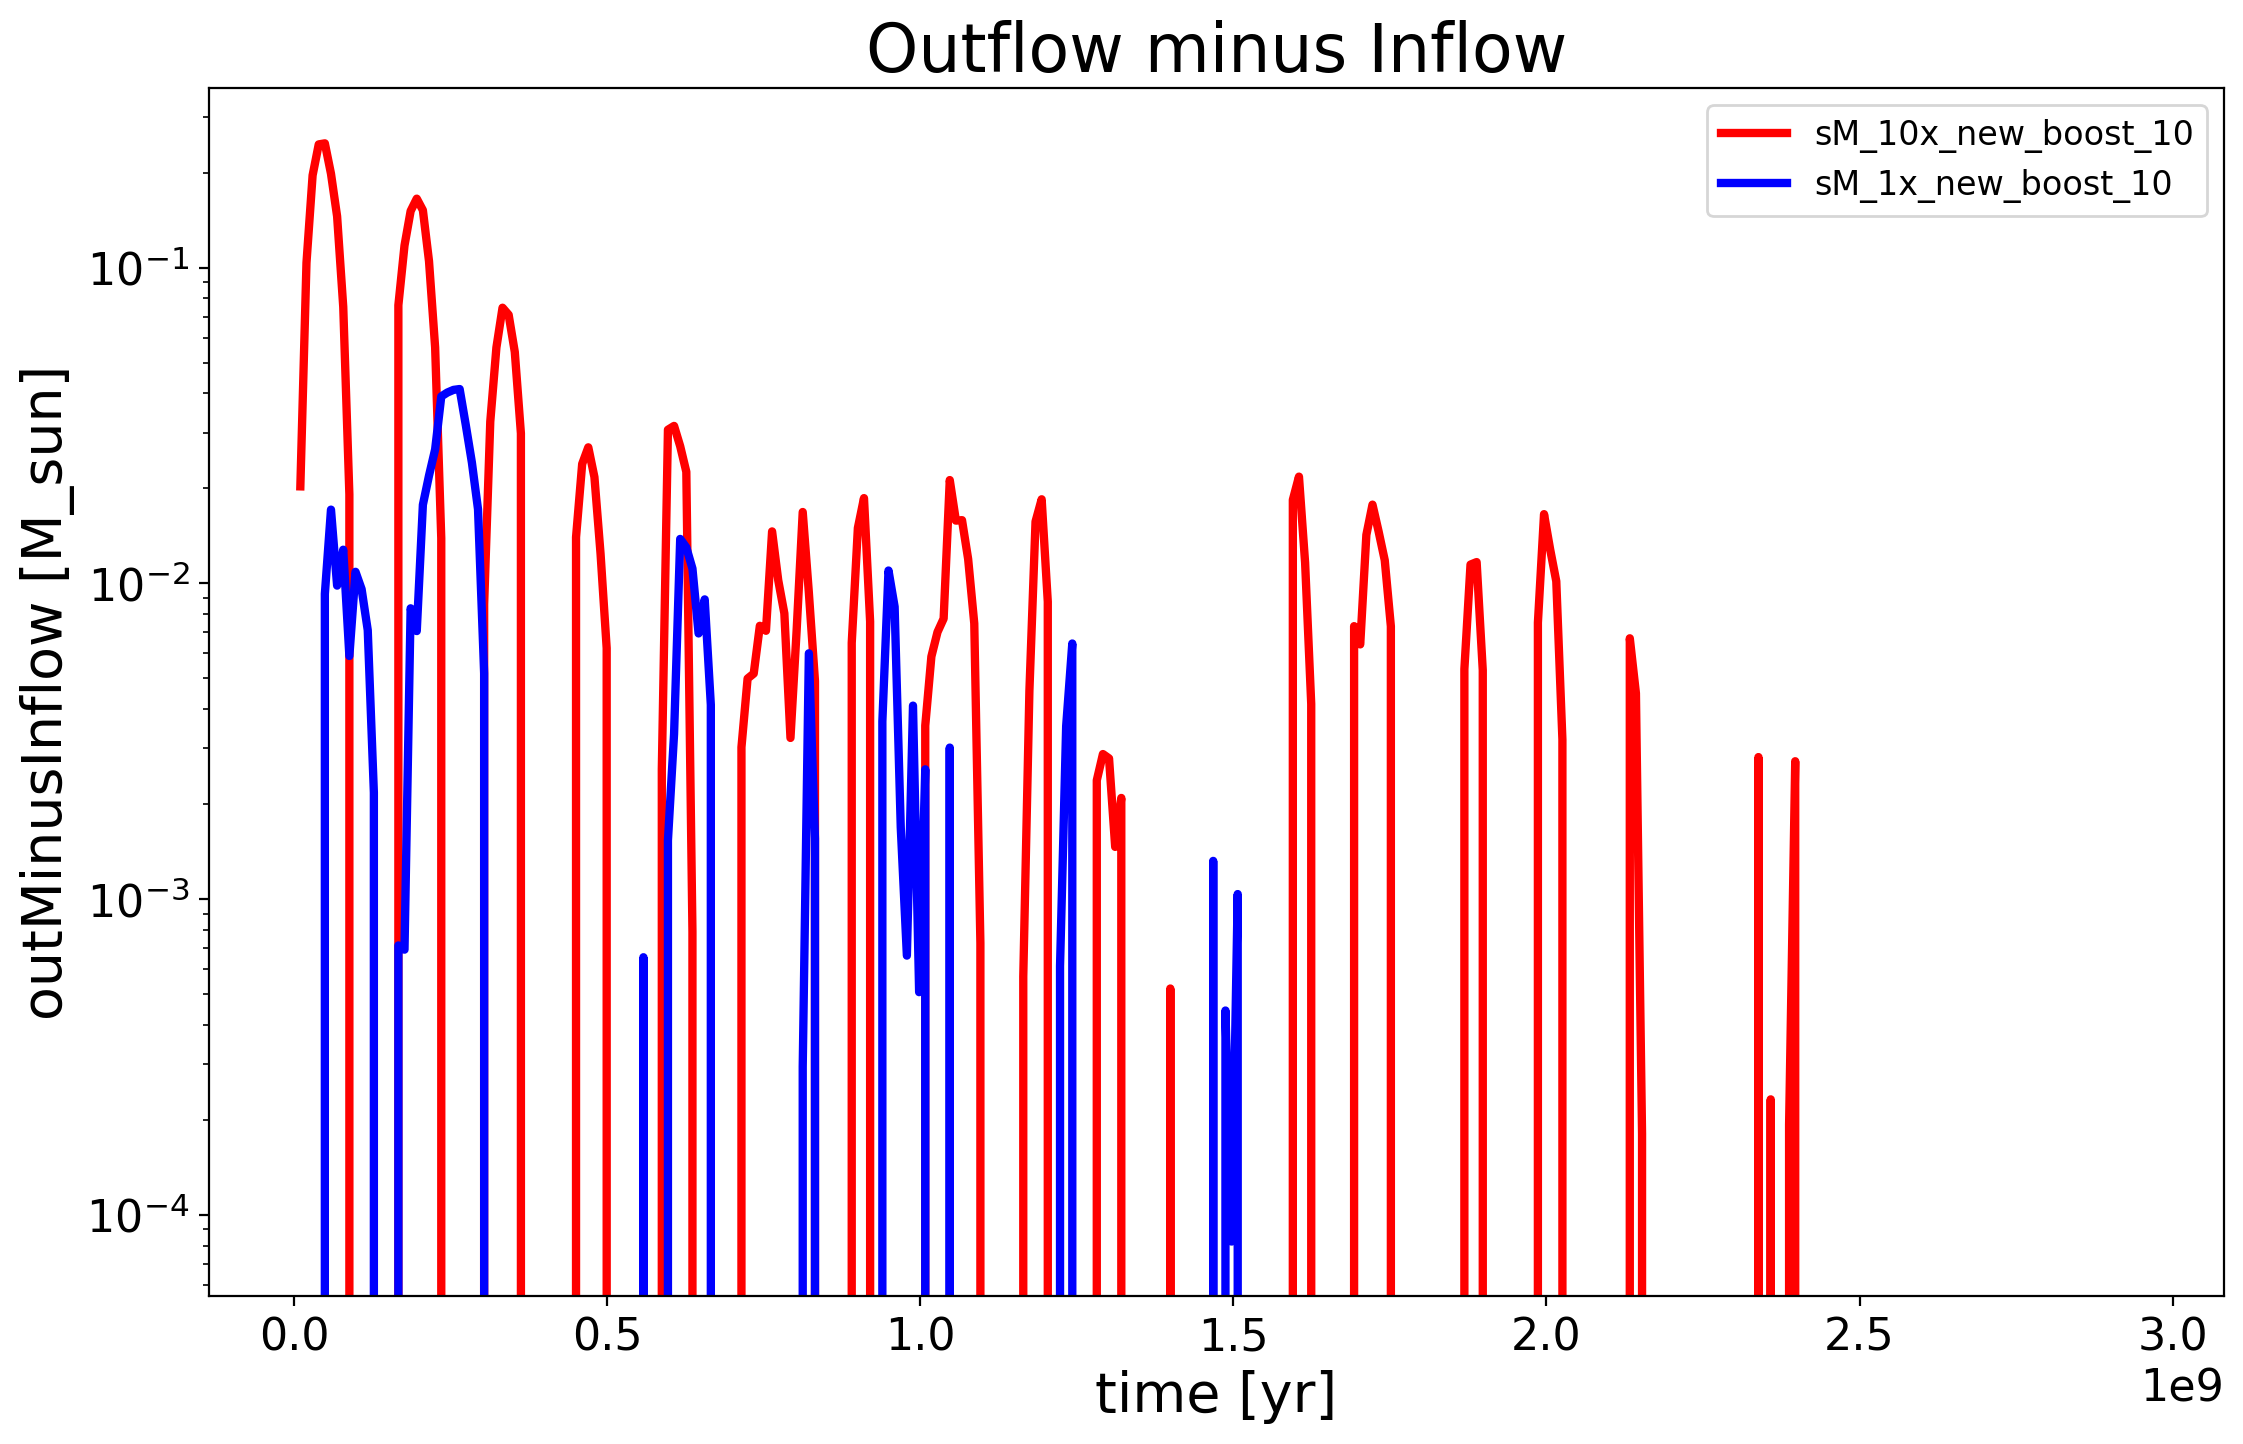

In [28]:
outMinusInflowArray = np.full((len(galaxyFolderNames), galaxyFrameAmount), 0, dtype = np.float64)

for i in range(len(galaxyFolderNames)):
    outMinusInflowArray[i] = clp.calculateOrLoadData(folder = galaxyDataFolders[i], 
                                        folderName = galaxyFolderNames[i], 
                                        dataName = "outMinusInflow", 
                                        calcDataOfOneSnapShotFunction = clp.getTotalOutflowMinusInflow, 
                                        frameAmount = galaxyFrameAmount, 
                                        recalculate = False)
    


clp.PlotData(data = outMinusInflowArray, 
         folderNames = galaxyFolderNames, 
         title = "Outflow minus Inflow", 
         ylabel = "outMinusInflow [M_sun]", 
         dataName = "outMinusInflow", 
         unit_conversion_factor = UnitMass_in_Msun / UnitTime_in_yr,
         frameAmount = galaxyFrameAmount, 
         frameNbrMultiplier = galaxyFrameNbrMultiplier,
         TimeBetSnapshot_in_unit_time = TimeBetSnapshot_in_unit_time,
         compareToAnalyticRadius = False)

recalculate data


300

recalculate data


300

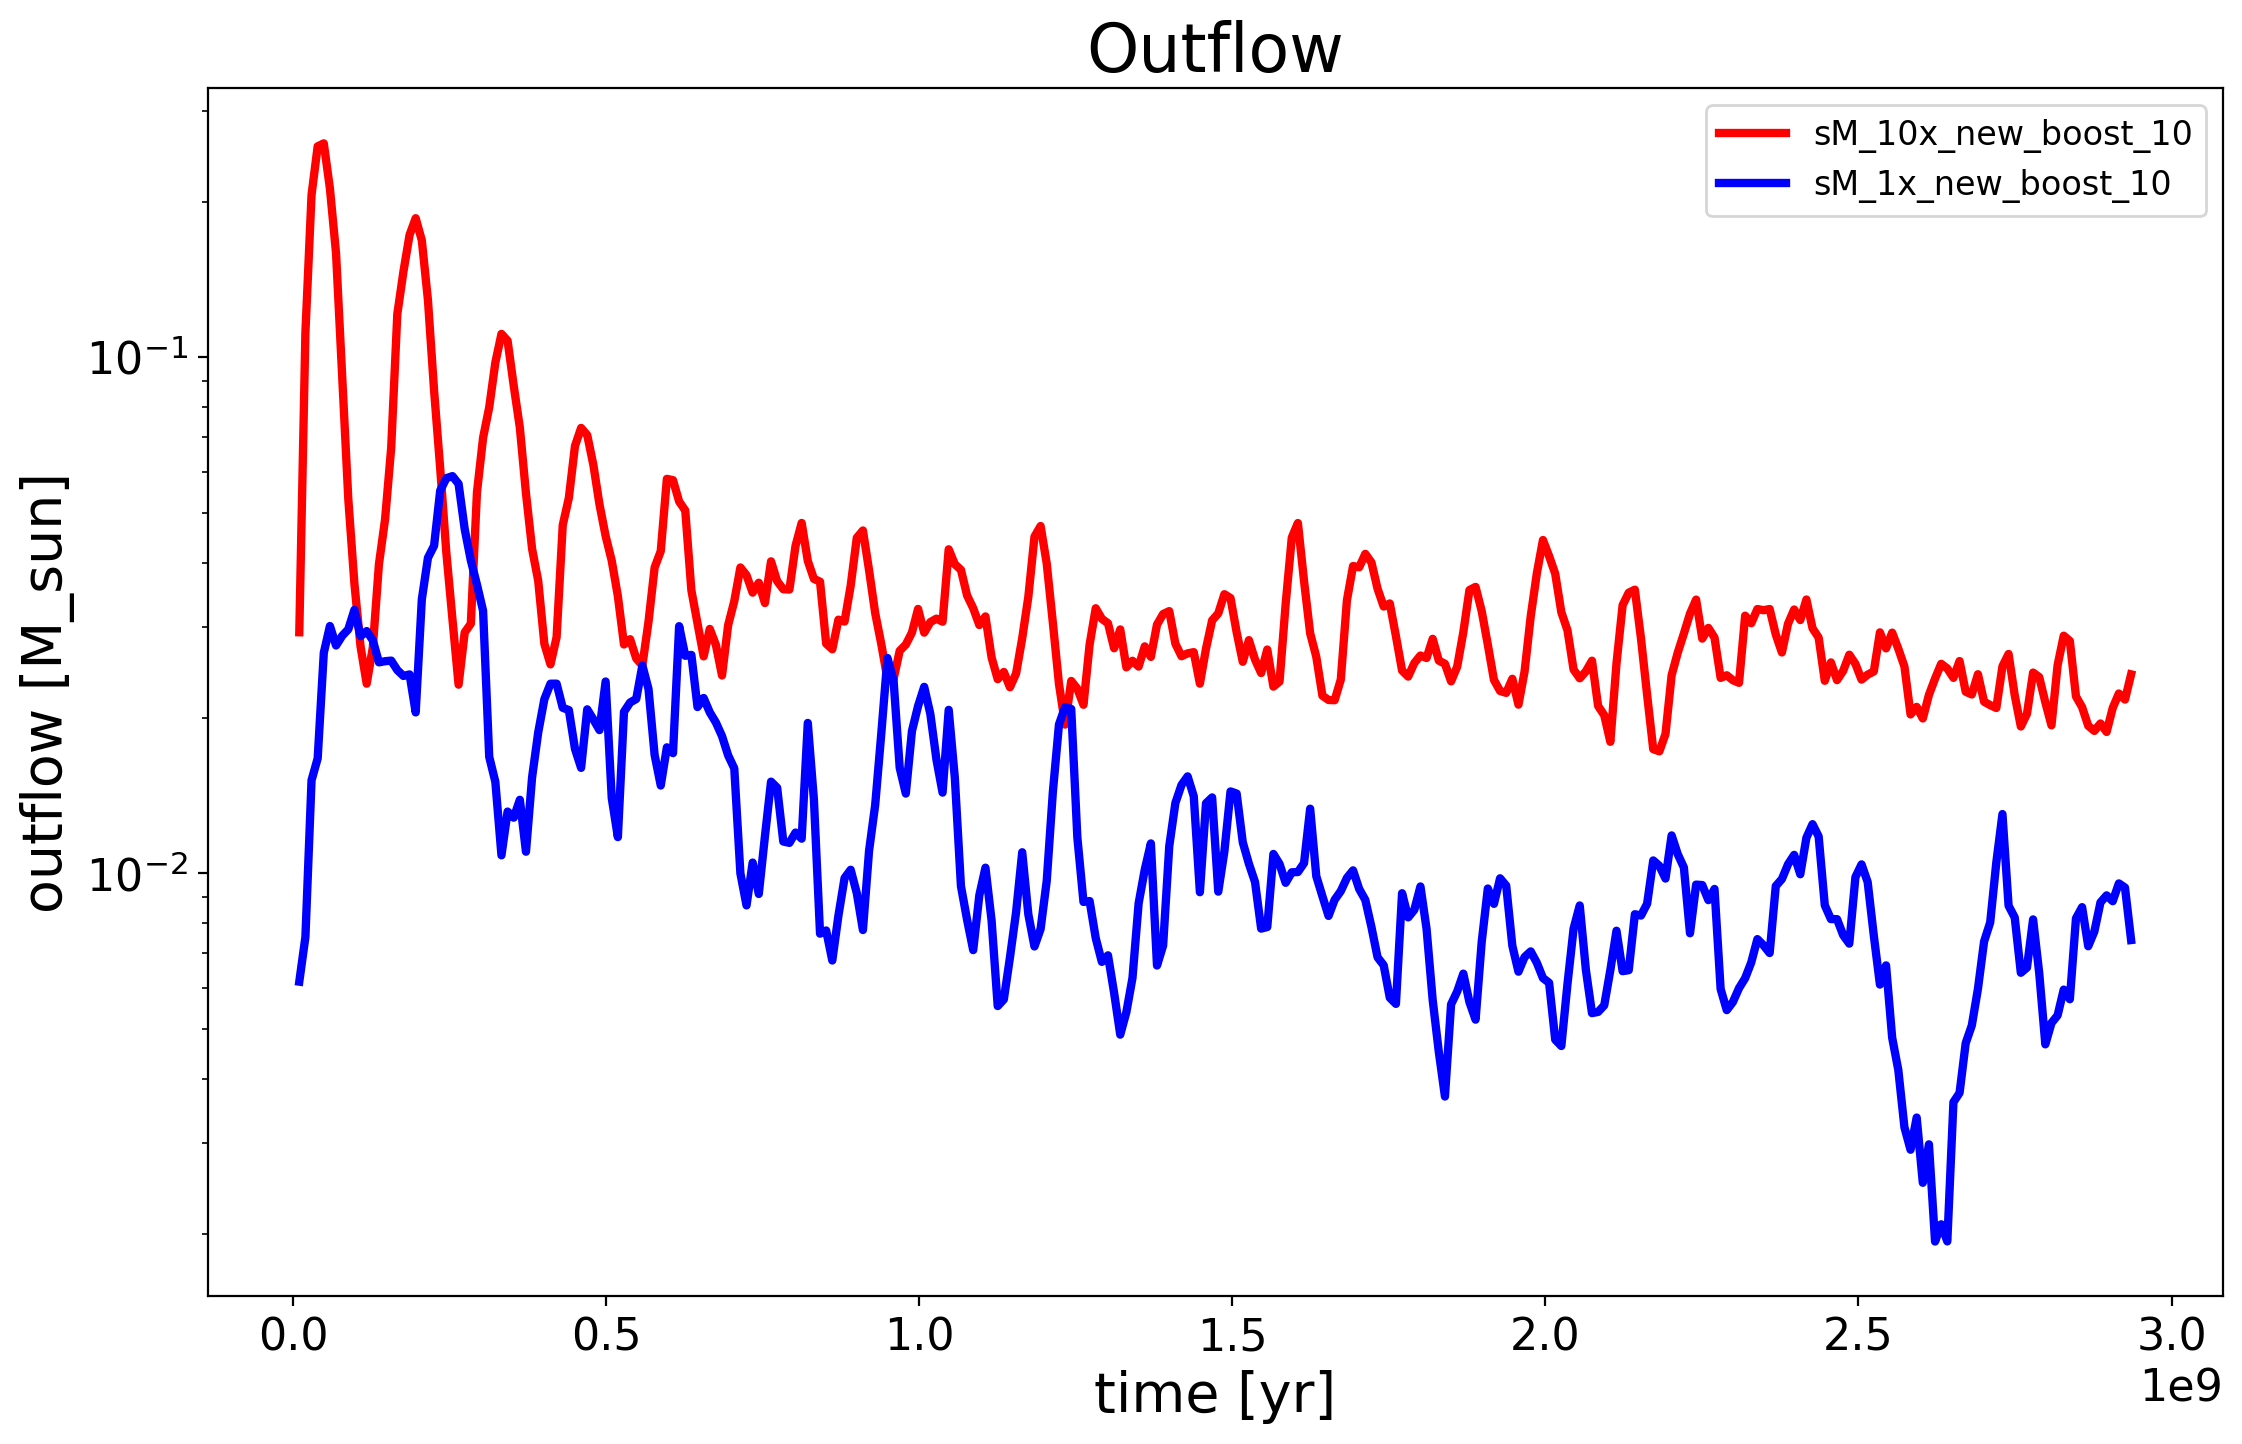

In [27]:
outflowArray = np.full((len(galaxyFolderNames), galaxyFrameAmount), 0, dtype = np.float64)

for i in range(len(galaxyFolderNames)):
    outflowArray[i] = clp.calculateOrLoadData(folder = galaxyDataFolders[i], 
                                        folderName = galaxyFolderNames[i], 
                                        dataName = "outflow", 
                                        calcDataOfOneSnapShotFunction = clp.getTotalOutflowMass, 
                                        frameAmount = galaxyFrameAmount, 
                                        recalculate = False)



clp.PlotData(data = outflowArray, 
         folderNames = galaxyFolderNames, 
         title = "Outflow", 
         ylabel = "outflow [M_sun]", 
         dataName = "outflow", 
         unit_conversion_factor = UnitMass_in_Msun,
         frameAmount = galaxyFrameAmount, 
         frameNbrMultiplier = galaxyFrameNbrMultiplier,
         TimeBetSnapshot_in_unit_time = TimeBetSnapshot_in_unit_time,
         compareToAnalyticRadius = False)

load data


ValueError: x and y must have same first dimension, but have shapes (300,) and (0, 301)

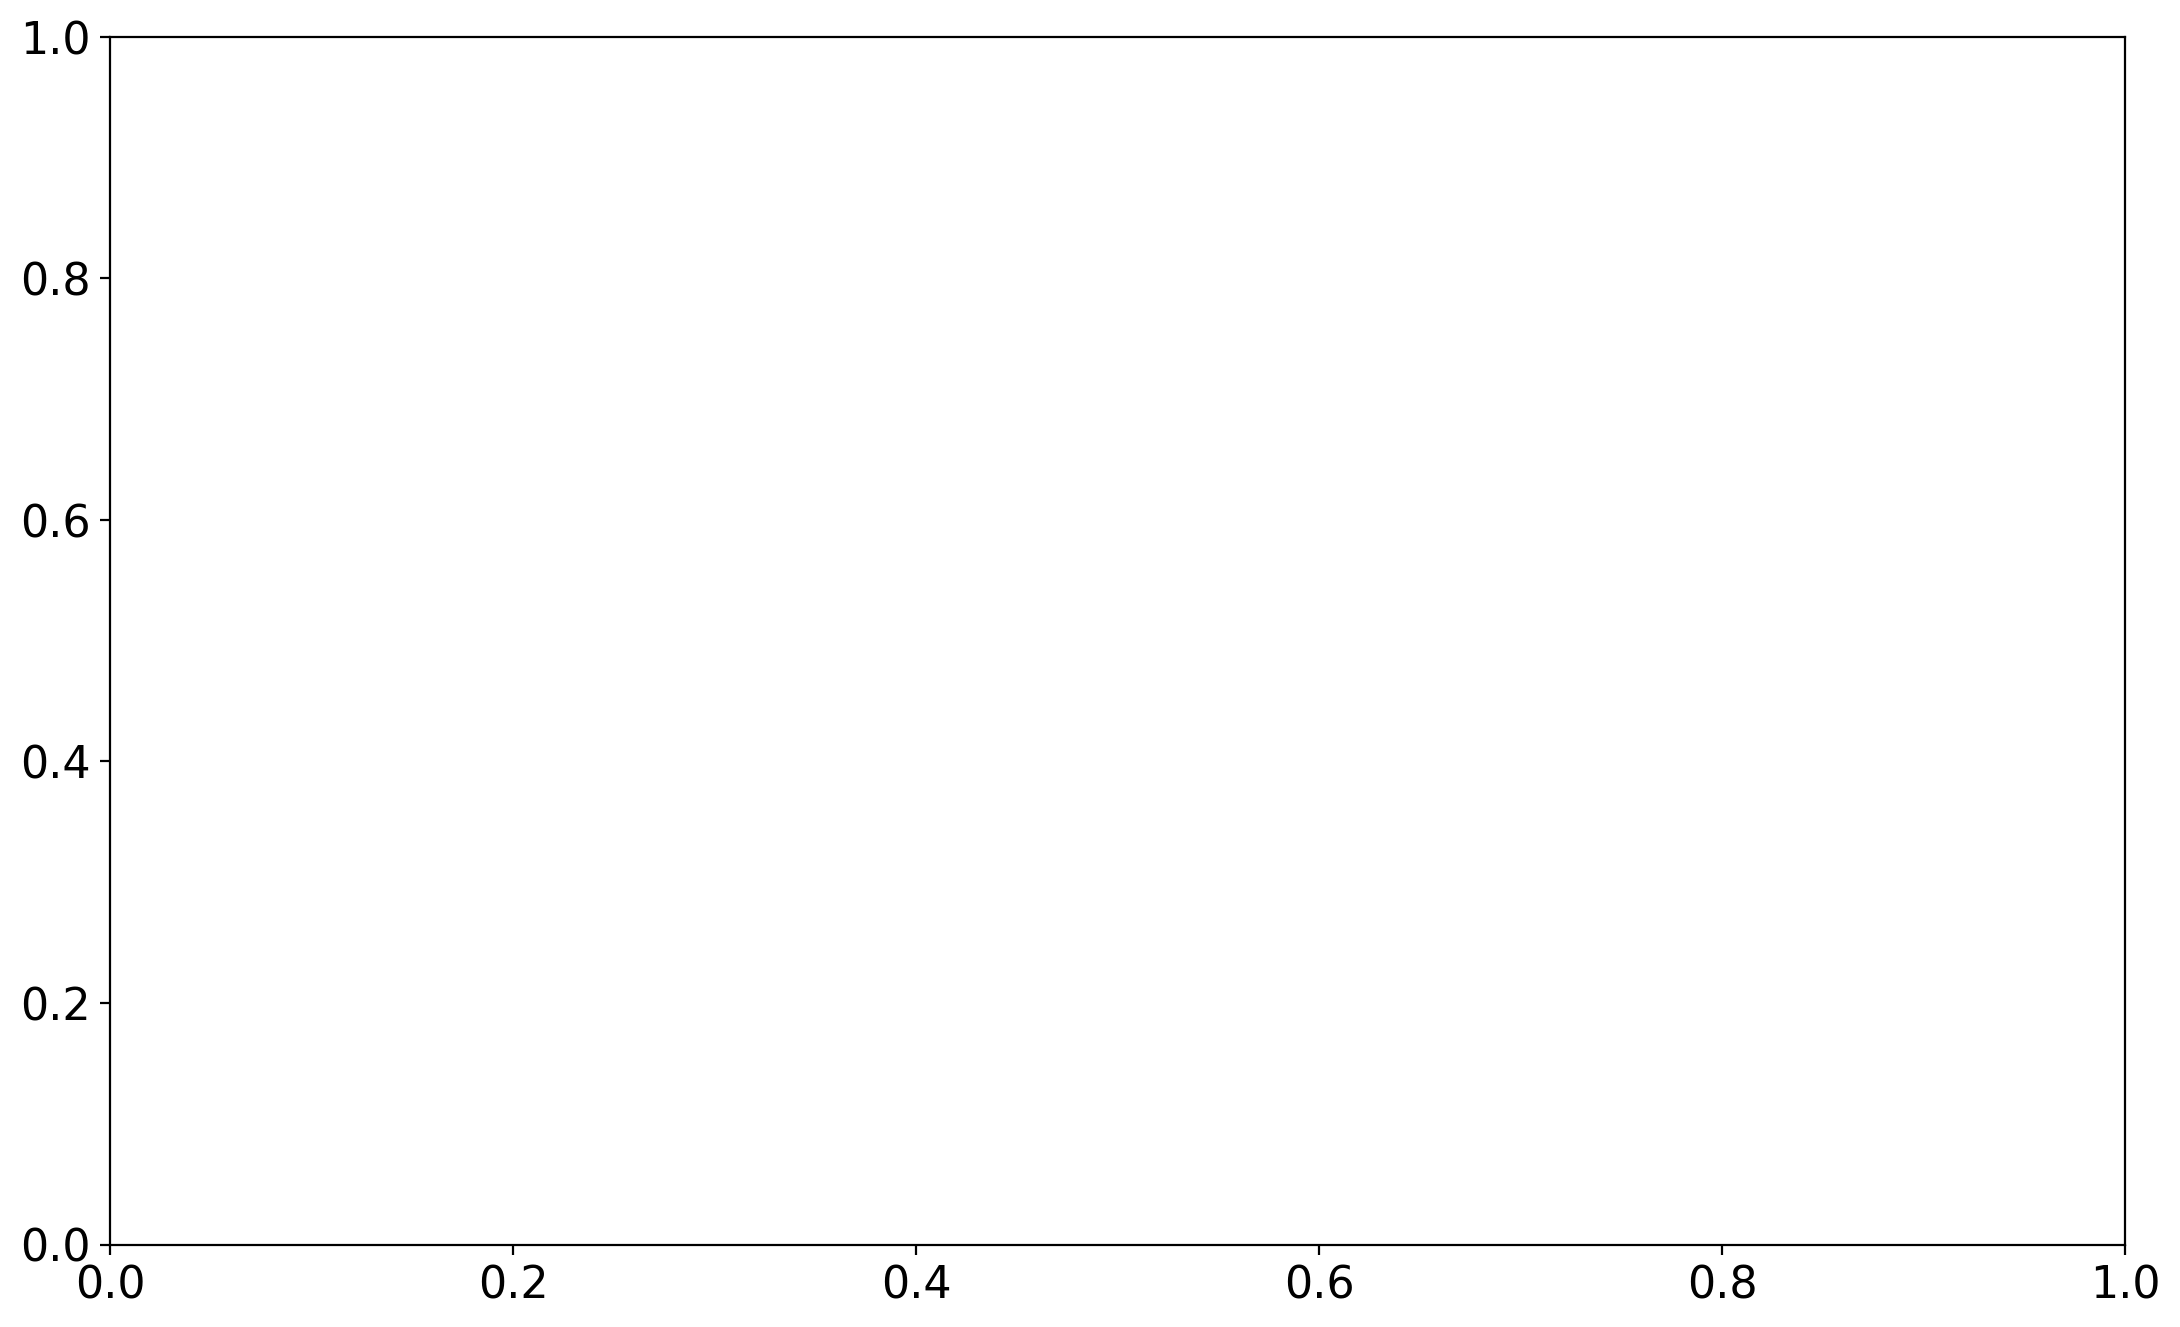

In [11]:
inflowArray = np.full((len(galaxyFolderNames), galaxyFrameAmount), 0, dtype = np.float64)

for i in range(len(galaxyFolderNames)):
    inflowArray[i] = clp.calculateOrLoadData(folder = galaxyDataFolders[i], 
                                        folderName = galaxyFolderNames[i], 
                                        dataName = "inflow", 
                                        calcDataOfOneSnapShotFunction = clp.getTotalInflowMass, 
                                        frameAmount = galaxyFrameAmount, 
                                        recalculate = False)



clp.PlotData(data = inflowArray, 
         folderNames = galaxyFolderNames, 
         title = "Inflow", 
         ylabel = "inflow [M_sun]", 
         dataName = "inflow", 
         unit_conversion_factor = UnitMass_in_Msun,
         frameAmount = galaxyFrameAmount, 
         frameNbrMultiplier = galaxyFrameNbrMultiplier,
         TimeBetSnapshot_in_unit_time = TimeBetSnapshot_in_unit_time,
         compareToAnalyticRadius = False)

In [9]:
outflowArray = np.full((len(galaxyFolderNames), galaxyFrameAmount), 0, dtype = np.float64)

for i in range(len(galaxyFolderNames)):
    outflowArray[i] = clp.calculateOrLoadData(folder = galaxyDataFolders[i], 
                                        folderName = galaxyFolderNames[i], 
                                        dataName = "outflow", 
                                        calcDataOfOneSnapShotFunction = clp.getTotalOutflowMass, 
                                        frameAmount = galaxyFrameAmount, 
                                        recalculate = False)


inflowArray = np.full((len(galaxyFolderNames), galaxyFrameAmount), 0, dtype = np.float64)

for i in range(len(galaxyFolderNames)):
    inflowArray[i] = clp.calculateOrLoadData(folder = galaxyDataFolders[i], 
                                        folderName = galaxyFolderNames[i], 
                                        dataName = "inflow", 
                                        calcDataOfOneSnapShotFunction = clp.getTotalInflowMass, 
                                        frameAmount = galaxyFrameAmount, 
                                        recalculate = False)
    

load data
load data
load data
load data
load data
load data
load data
load data


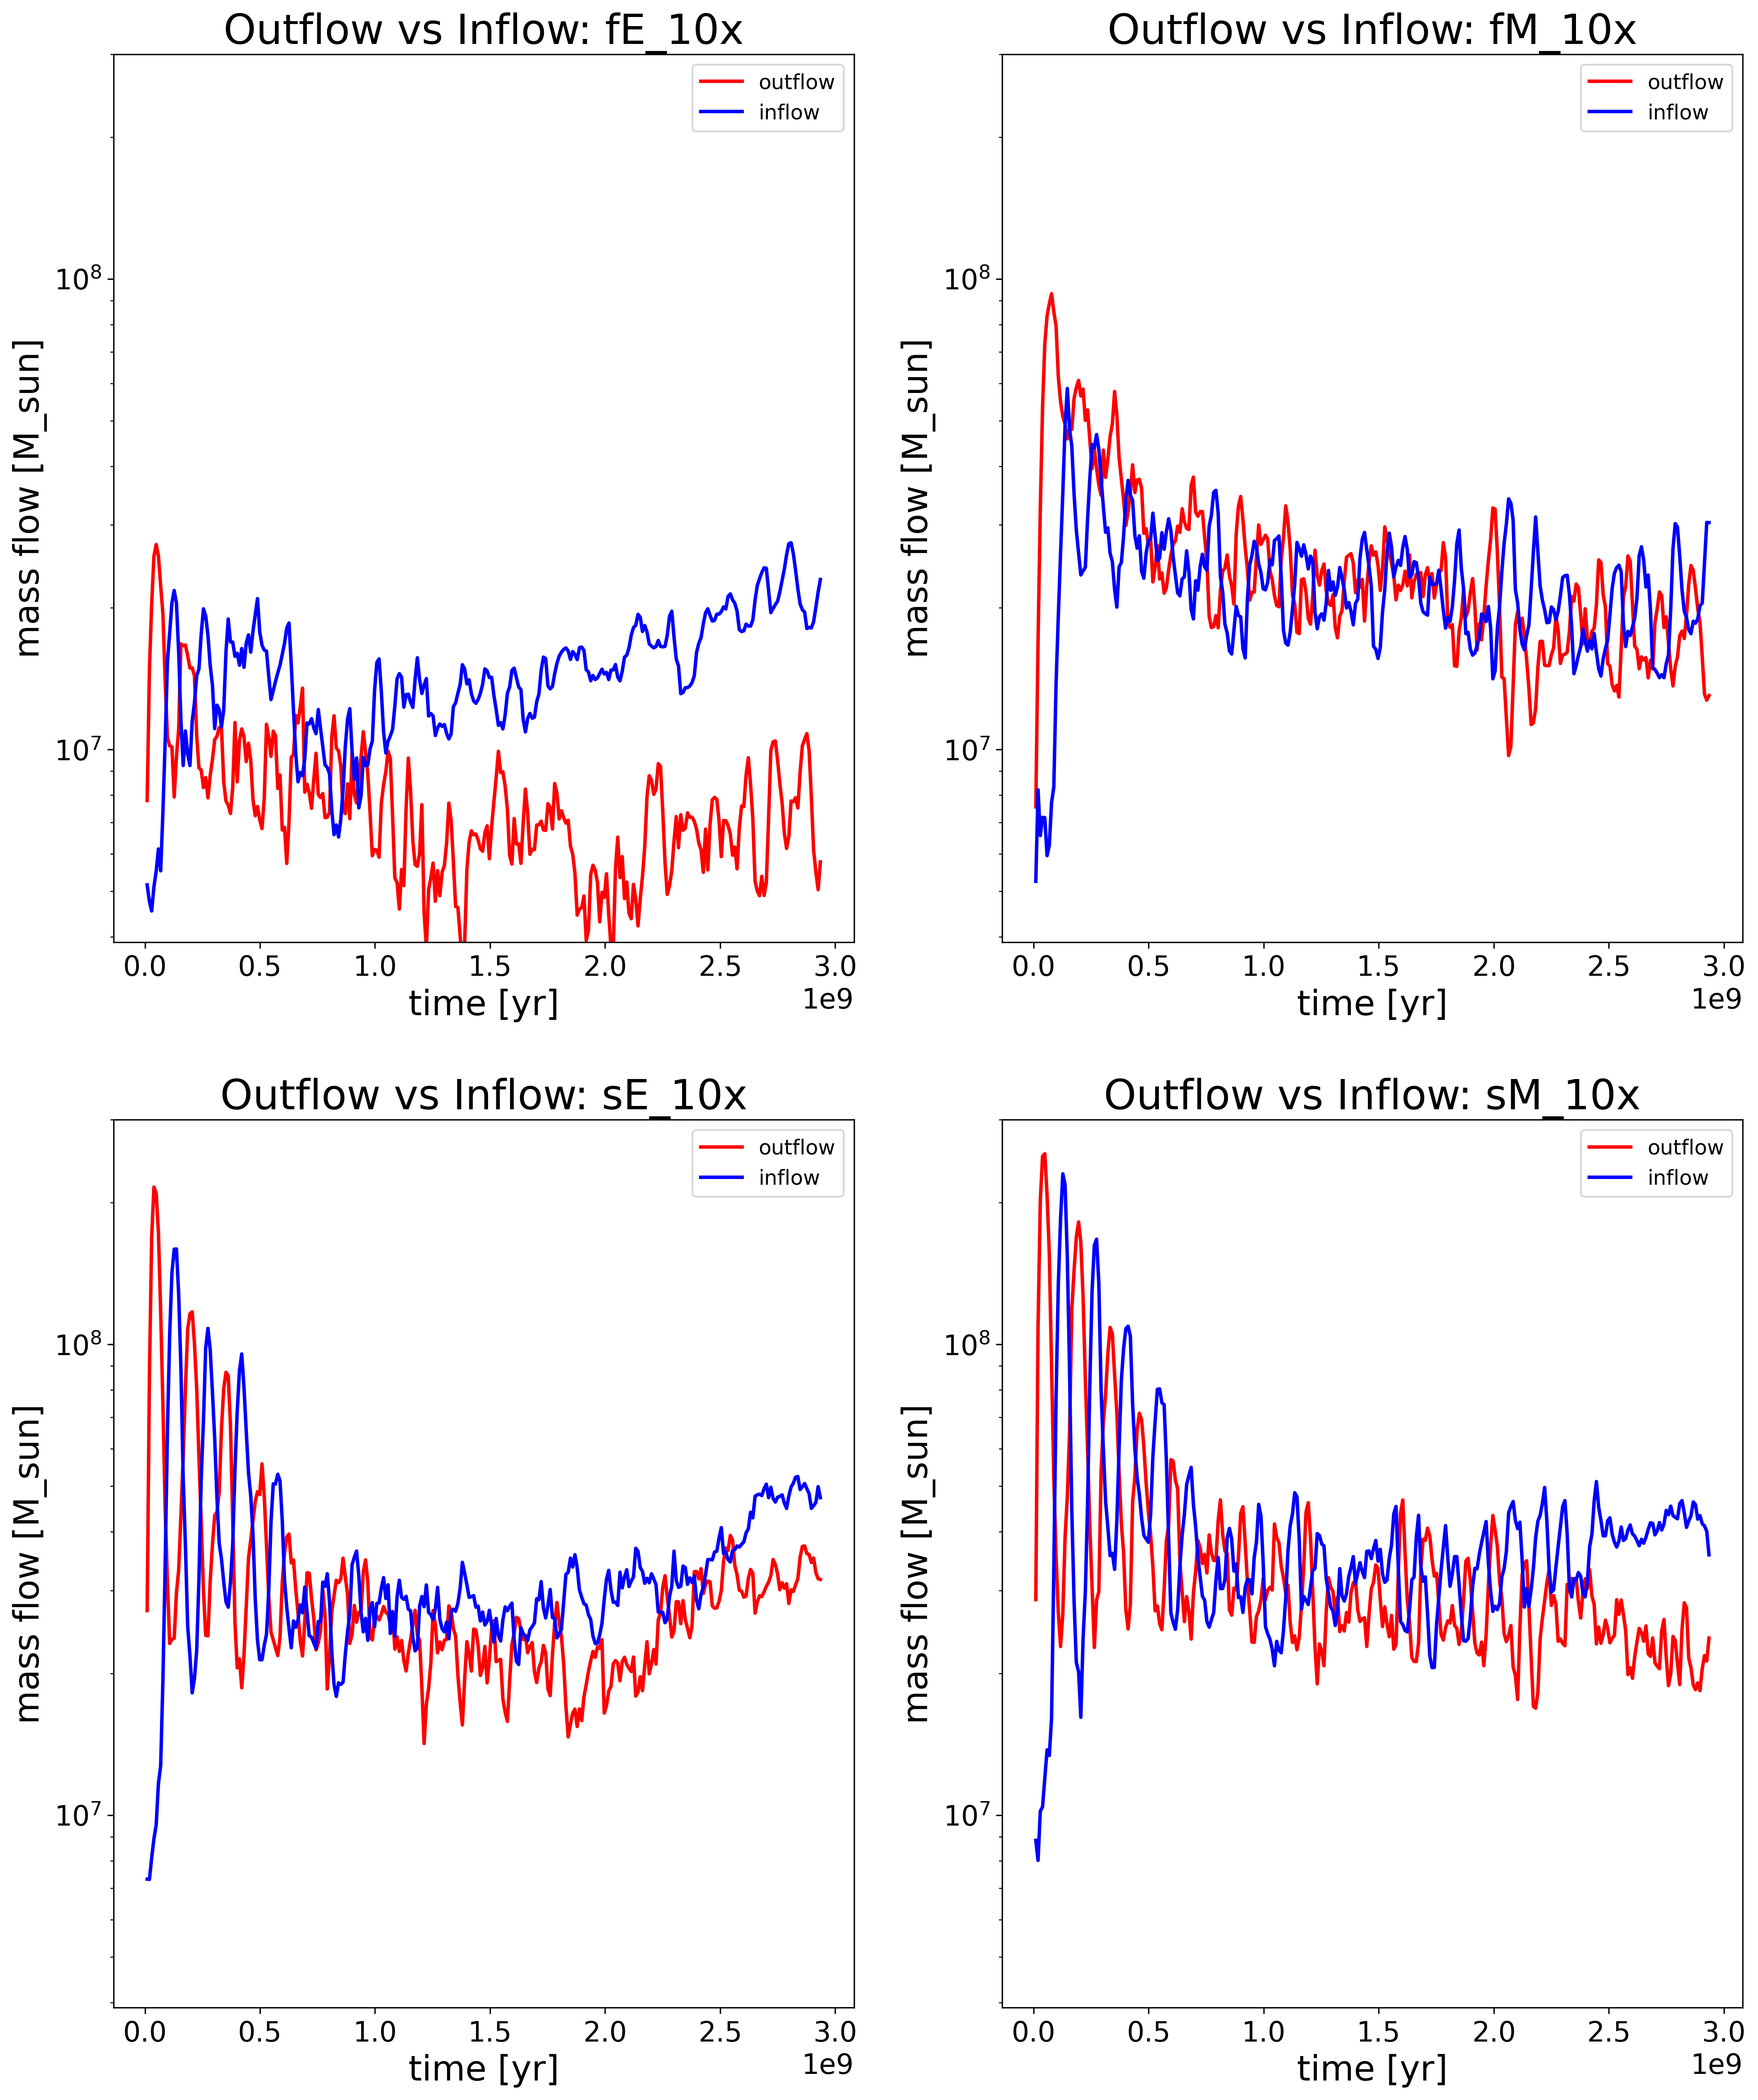

In [11]:

title = "Outflow vs Inflow"
xlabel = "time [yr]"
ylabel = "mass flow [M_sun]"
dataName = "inflowVSOutflow"
#folderNames = ["fE_10x"]
frameAmount = galaxyFrameAmount
frameNbrMultiplier = galaxyFrameNbrMultiplier
TimeBetSnapshot_in_unit_time = TimeBetSnapshot_in_unit_time
unit_conversion_factor = UnitMass_in_Msun


TimeBetSnapshot_in_s = TimeBetSnapshot_in_unit_time * UnitTime_in_s
TimeBetSnapshot_in_yr = TimeBetSnapshot_in_s * sec_to_yr
timeScaleToYears = np.linspace(0,TimeBetSnapshot_in_yr*(frameAmount-1),frameAmount)



plt.subplots(nrows=2, ncols=2, figsize=(16.9,20.4), dpi=300)

# Create the first subplot

titles = ["fE_10x", "fM_10x", "sE_10x", "sM_10x"]


for i in range(len(galaxyFolderNames)):
    plt.subplot(2, 2, i+1)
    plt.plot(timeScaleToYears[1:frameAmount]*frameNbrMultiplier, outflowArray[i][1:frameAmount] * unit_conversion_factor, label="outflow", linewidth=2)
    plt.plot(timeScaleToYears[1:frameAmount]*frameNbrMultiplier, inflowArray[i][1:frameAmount] * unit_conversion_factor, label="inflow", linewidth=2)

    ax = plt.gca()
    ax.set_ylim([3.9e6, 3e8])
    
    plt.yscale("log")
    plt.title(title + ": " + titles[i])
    plt.legend()

    plt.style.use('./my_style.mplstyle')
    #plt.legend(["1 star center", "10 stars center", "100 stars center", "10 stars flat dist", "100 stars flat dist", "analytical 1 SN", "analytical 10 SNe", "analytical 100 SNe"])
    #plt.legend(["1 star", "10 stars r=10pc", "10 stars t=5kyr", "10 stars r=10pc t=5kyr"])
    plt.xlabel(xlabel)
    #plt.ylabel("Max velocity ["+str(round(UnitVelocity_in_km_per_s))+ " km/s]")
    plt.ylabel(ylabel)
    #fig = plt.figure()#figsize=(16.18 * 2, 10 * 2))
    #fig.set_dpi(150.0)
    #fig.patch.set_facecolor('xkcd:mint green')
    
    
saveName = "/vera/u/xboecker/jupyterNotebooksOutputs/plots/"+dataName
for i in range(len(galaxyFolderNames)):
    saveName += "-"+galaxyFolderNames[i]

saveName += ".png"
plt.savefig(saveName)#, facecolor='w')

plt.show()

#### DM particle mass

In [14]:
def LoadDMDataFromHDF(folder, timeStep, dataName):
    with h5py.File(folder+"/snap_"+str(timeStep).zfill(3) +".hdf5", "r") as hdf:
        data = np.array(hdf.get("PartType1/"+dataName))
    return data

def getDMParticleMass(folder, timeStep):
    with h5py.File(folder+"/snap_"+str(timeStep).zfill(3) +".hdf5", "r") as f:
        return dict(f["Header"].attrs.items())["MassTable"][1]

In [17]:
for i in range(3):
    folder = galaxyDataFolders[i]
    timeStep = 0

    #masses = clp.getMasses(folder, timeStep) * 1.989e43 * g_to_Msun
    masses = getDMParticleMass(folder, timeStep) * 1.989e43 * g_to_Msun * 5e4
    print(masses, np.shape(masses))
    #plt.hist(np.log10(masses * 1e10), bins=100)
    #plt.xlabel("log(msun)")
    #plt.yscale("log")

490411982884.28064 ()
49041198288.42807 ()
4904119828.842807 ()


### SFR

load data
load data
load data
[0.00000000e+00 9.78462075e+06 1.95692415e+07 2.93538623e+07
 3.91384830e+07 4.89231038e+07 5.87077245e+07 6.84923453e+07
 7.82769660e+07 8.80615868e+07 9.78462075e+07 1.07630828e+08
 1.17415449e+08 1.27200070e+08 1.36984691e+08 1.46769311e+08
 1.56553932e+08 1.66338553e+08 1.76123174e+08 1.85907794e+08
 1.95692415e+08 2.05477036e+08 2.15261657e+08 2.25046277e+08
 2.34830898e+08 2.44615519e+08 2.54400140e+08 2.64184760e+08
 2.73969381e+08 2.83754002e+08 2.93538623e+08 3.03323243e+08
 3.13107864e+08 3.22892485e+08 3.32677106e+08 3.42461726e+08
 3.52246347e+08 3.62030968e+08 3.71815589e+08 3.81600209e+08
 3.91384830e+08 4.01169451e+08 4.10954072e+08 4.20738692e+08
 4.30523313e+08 4.40307934e+08 4.50092555e+08 4.59877175e+08
 4.69661796e+08 4.79446417e+08 4.89231038e+08 4.99015658e+08
 5.08800279e+08 5.18584900e+08 5.28369521e+08 5.38154141e+08
 5.47938762e+08 5.57723383e+08 5.67508004e+08 5.77292624e+08
 5.87077245e+08 5.96861866e+08 6.06646487e+08 6.1643110

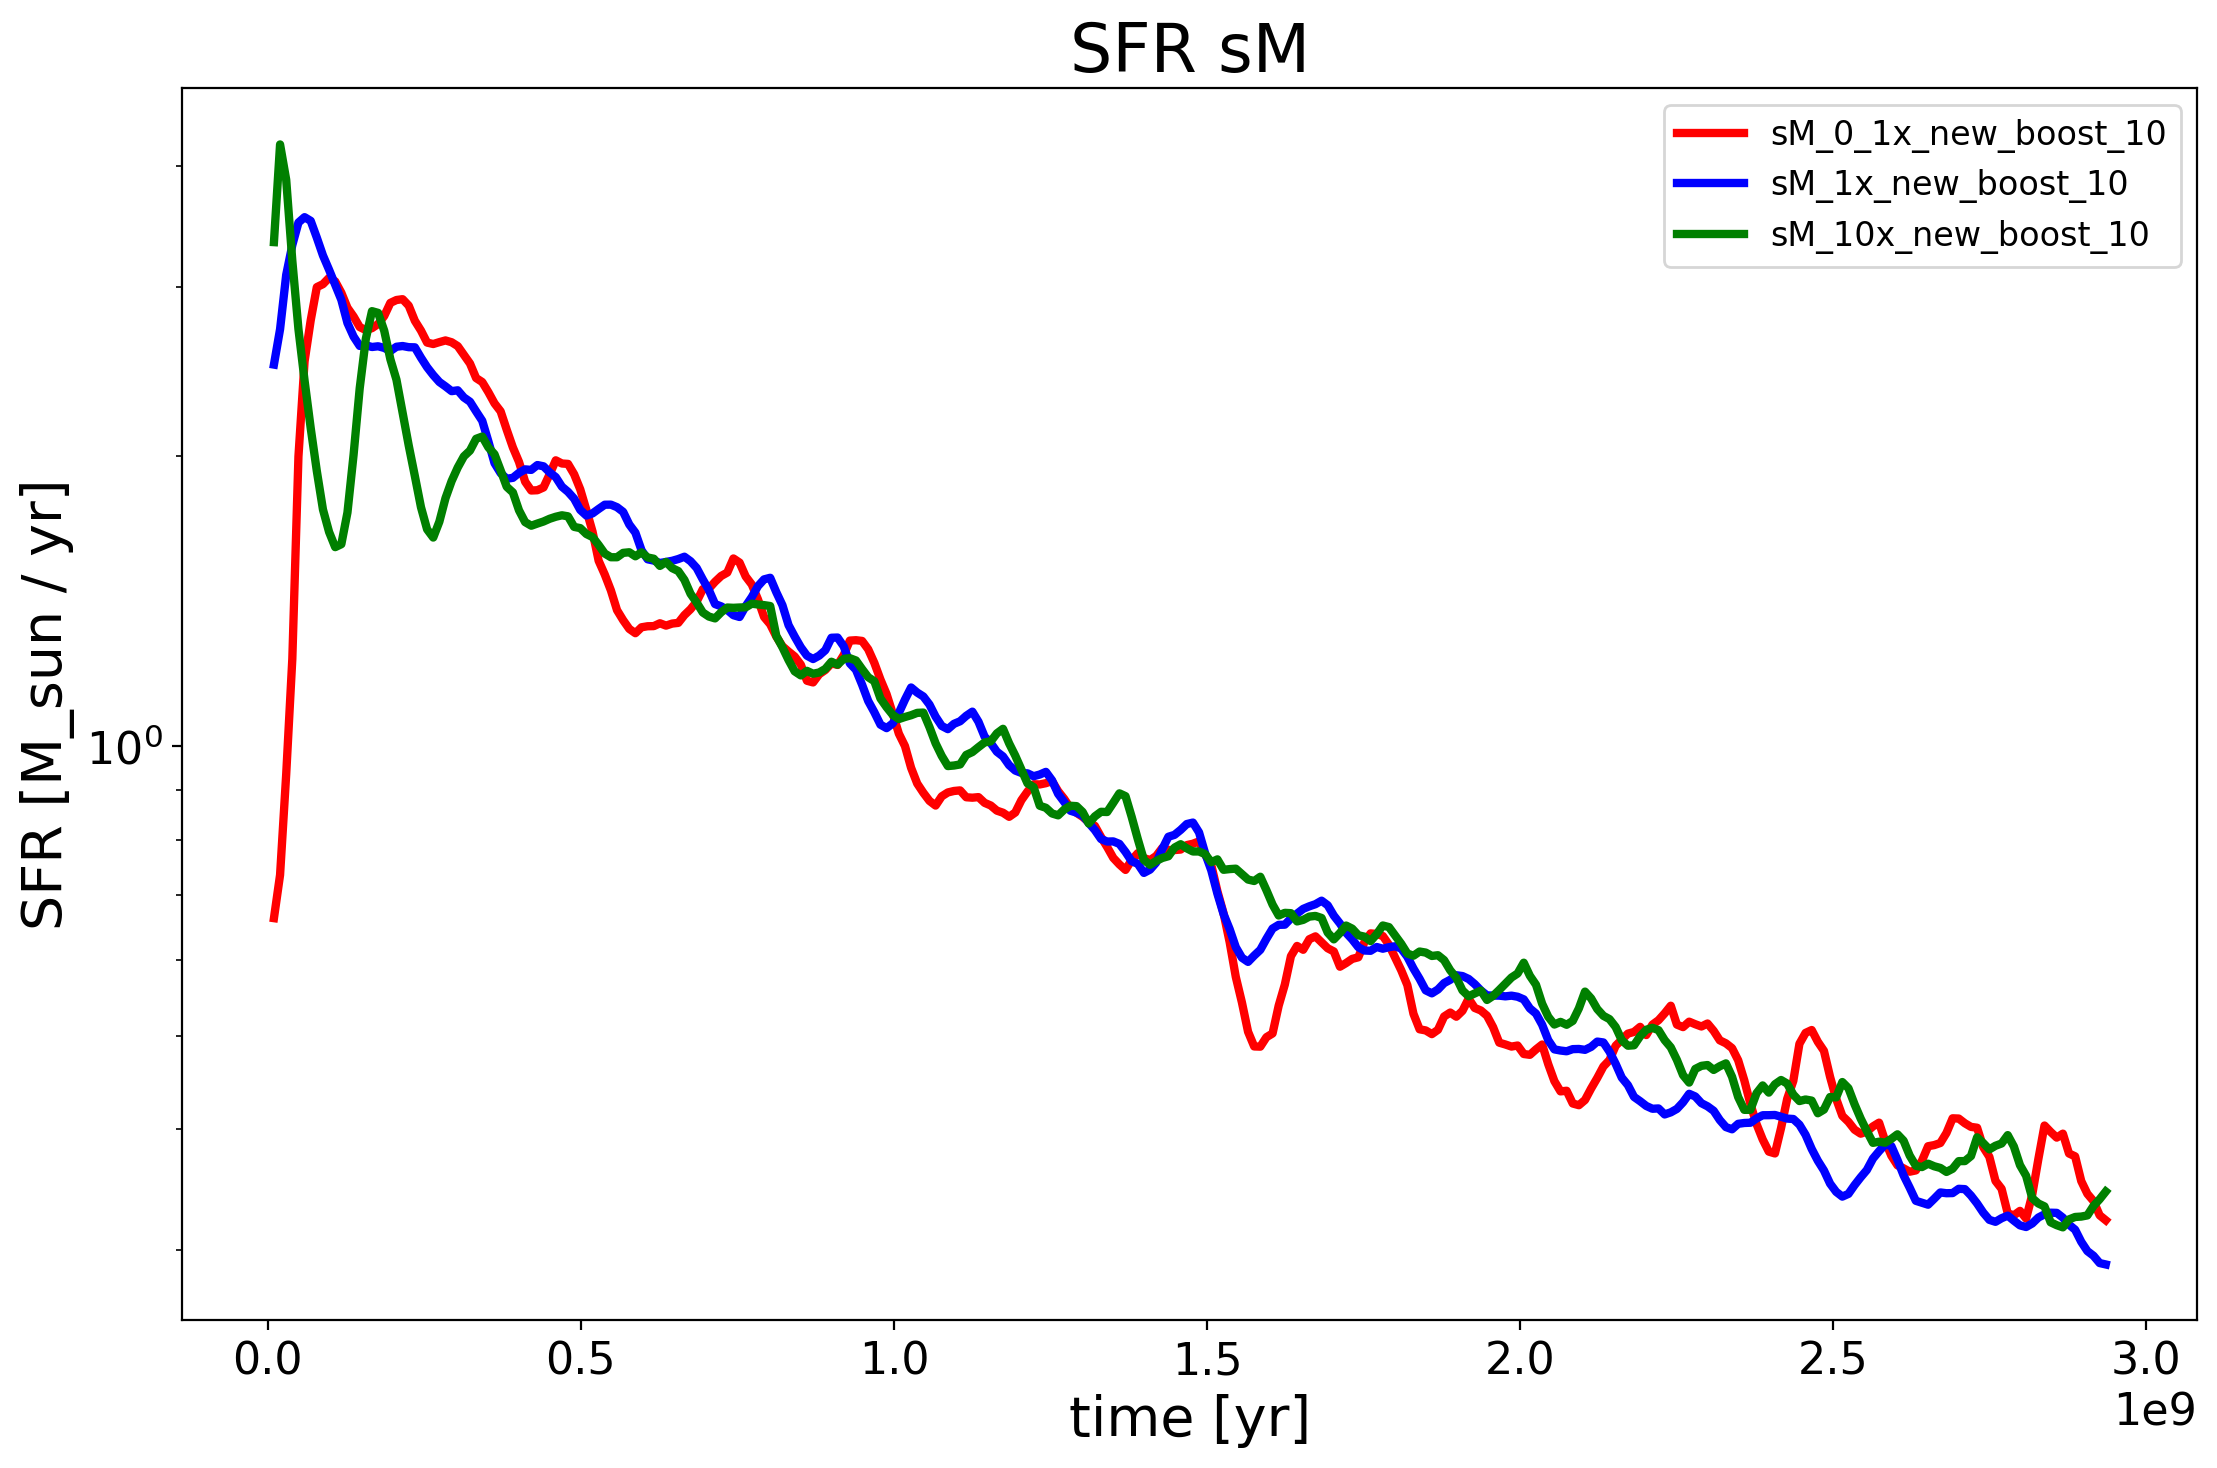

In [32]:
sfrArray = np.full((len(galaxyFolderNames), galaxyFrameAmount), 0, dtype = np.float64)

for i in range(len(galaxyFolderNames)):
    sfrArray[i] = clp.calculateOrLoadData(folder = galaxyDataFolders[i], 
                                        folderName = galaxyFolderNames[i], 
                                        dataName = "SFR", 
                                        calcDataOfOneSnapShotFunction = clp.getTotalSFR, 
                                        frameAmount = galaxyFrameAmount, 
                                        recalculate = False)



clp.PlotData(data = sfrArray, 
         folderNames = galaxyFolderNames, 
         title = "SFR sM", 
         ylabel = "SFR [M_sun / yr]", 
         dataName = "SFR", 
         unit_conversion_factor = 1,
         frameAmount = galaxyFrameAmount, 
         frameNbrMultiplier = galaxyFrameNbrMultiplier,
         TimeBetSnapshot_in_unit_time = TimeBetSnapshot_in_unit_time,
         compareToAnalyticRadius = False)

load data
load data
load data
[0.00000000e+00 9.78462075e+06 1.95692415e+07 2.93538623e+07
 3.91384830e+07 4.89231038e+07 5.87077245e+07 6.84923453e+07
 7.82769660e+07 8.80615868e+07 9.78462075e+07 1.07630828e+08
 1.17415449e+08 1.27200070e+08 1.36984691e+08 1.46769311e+08
 1.56553932e+08 1.66338553e+08 1.76123174e+08 1.85907794e+08
 1.95692415e+08 2.05477036e+08 2.15261657e+08 2.25046277e+08
 2.34830898e+08 2.44615519e+08 2.54400140e+08 2.64184760e+08
 2.73969381e+08 2.83754002e+08 2.93538623e+08 3.03323243e+08
 3.13107864e+08 3.22892485e+08 3.32677106e+08 3.42461726e+08
 3.52246347e+08 3.62030968e+08 3.71815589e+08 3.81600209e+08
 3.91384830e+08 4.01169451e+08 4.10954072e+08 4.20738692e+08
 4.30523313e+08 4.40307934e+08 4.50092555e+08 4.59877175e+08
 4.69661796e+08 4.79446417e+08 4.89231038e+08 4.99015658e+08
 5.08800279e+08 5.18584900e+08 5.28369521e+08 5.38154141e+08
 5.47938762e+08 5.57723383e+08 5.67508004e+08 5.77292624e+08
 5.87077245e+08 5.96861866e+08 6.06646487e+08 6.1643110

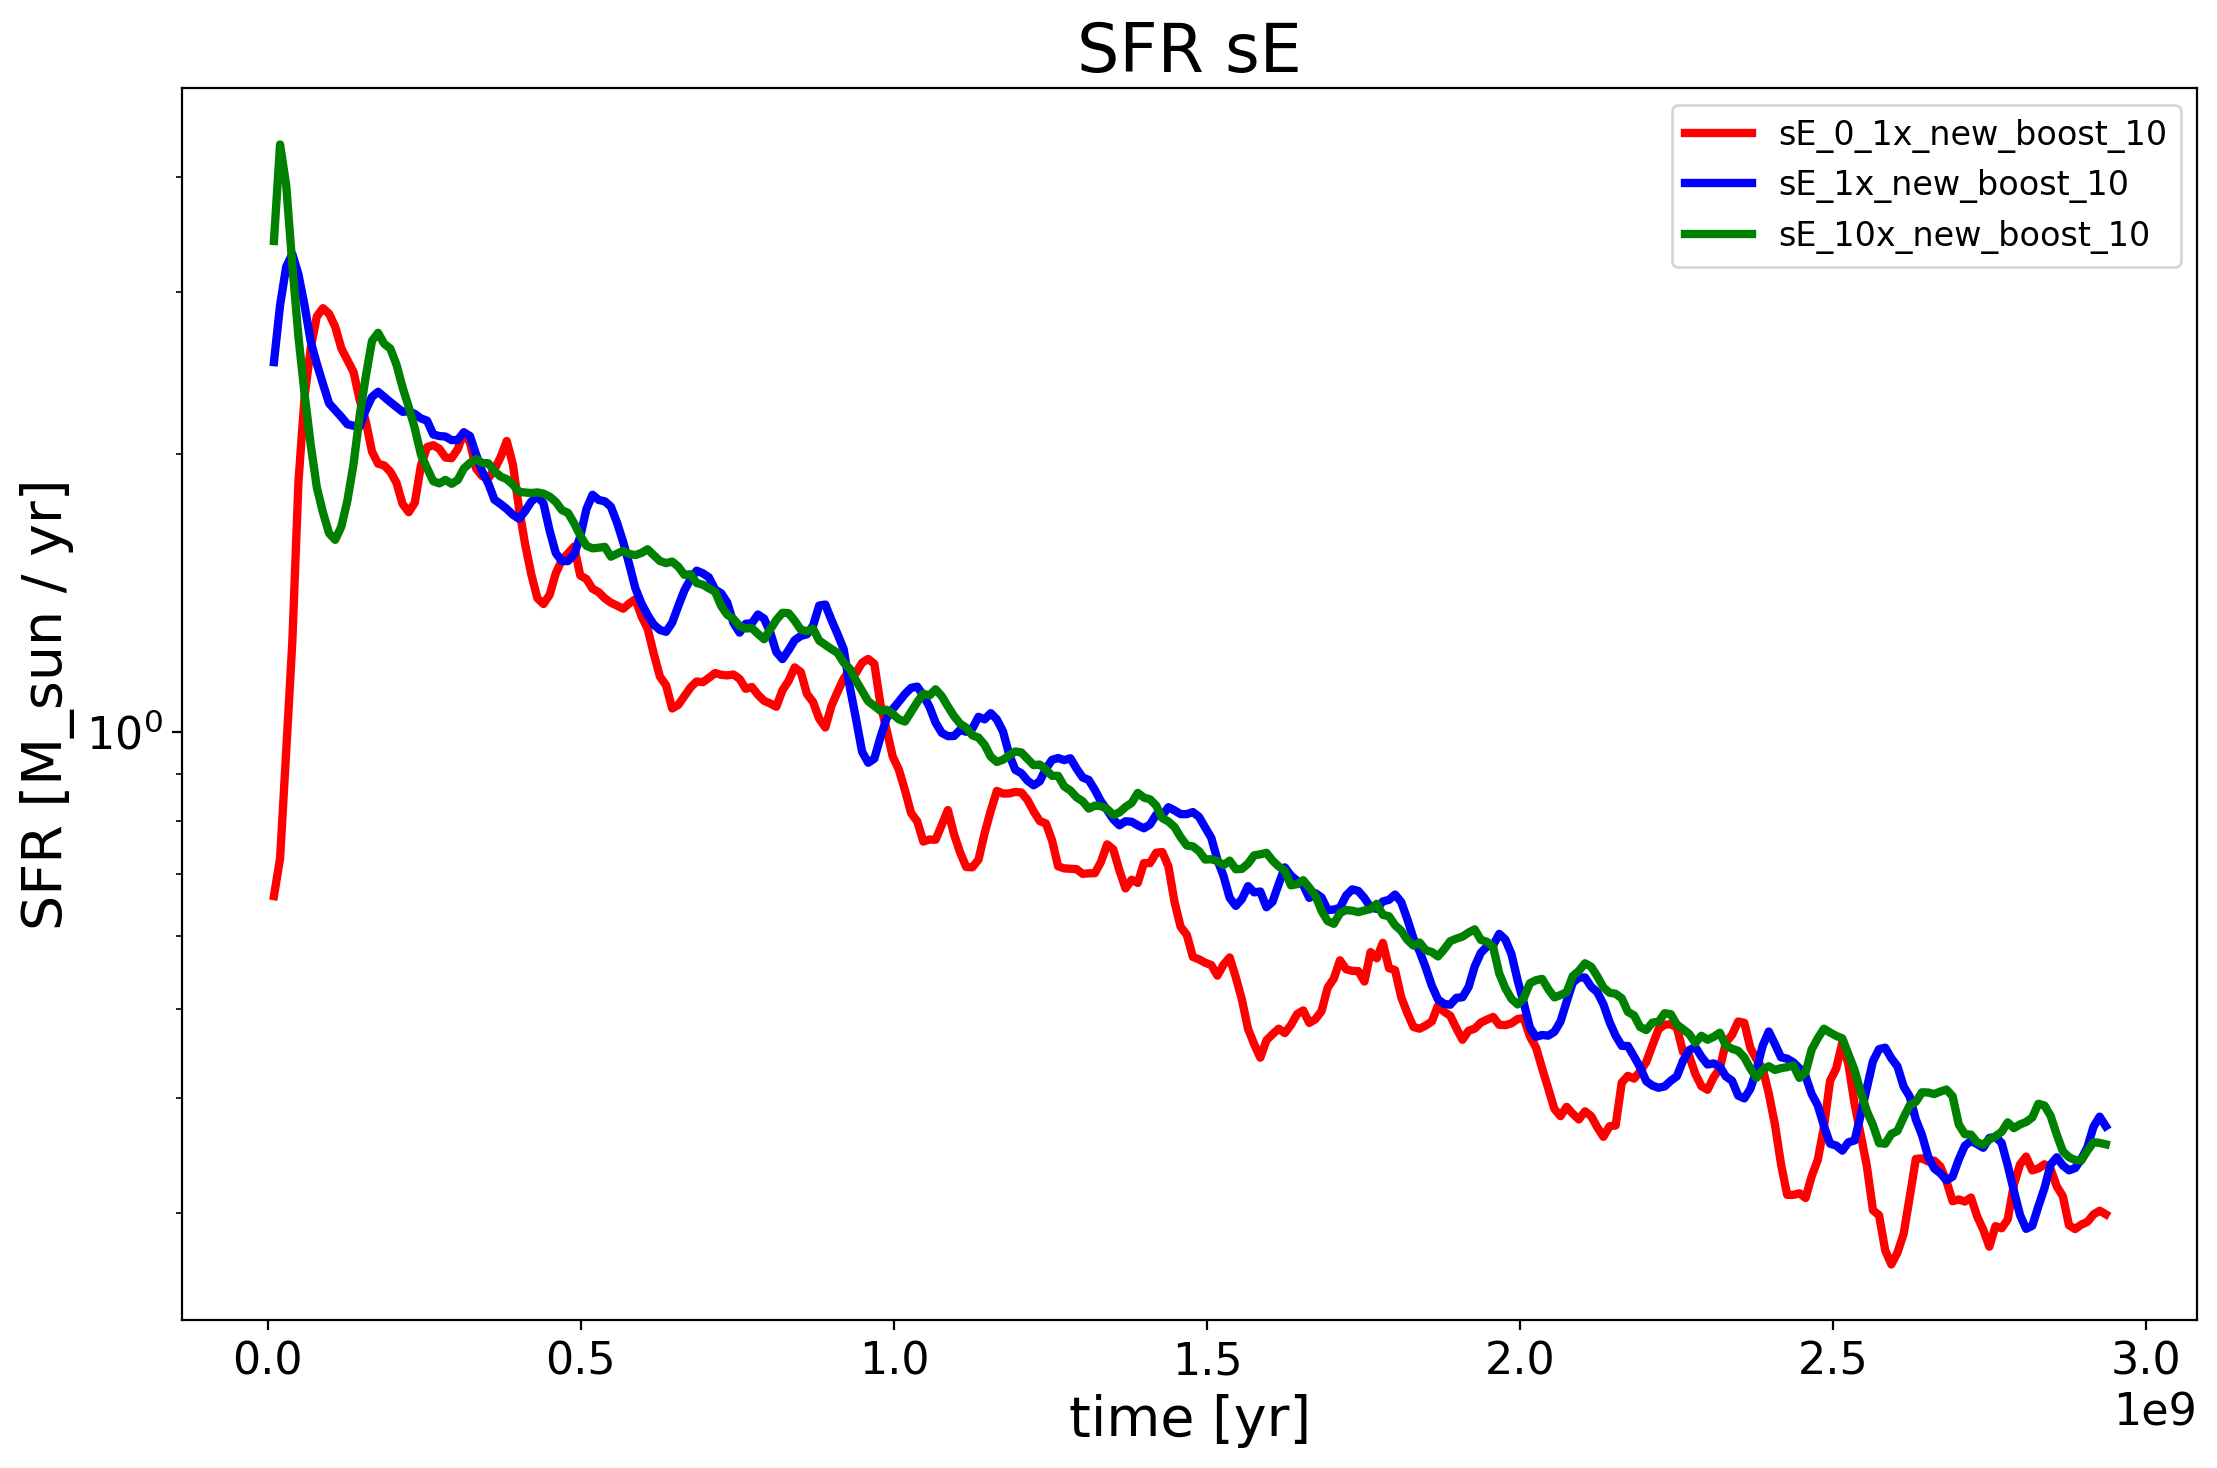

In [24]:
sfrArray = np.full((len(galaxyFolderNames), galaxyFrameAmount), 0, dtype = np.float64)

for i in range(len(galaxyFolderNames)):
    sfrArray[i] = clp.calculateOrLoadData(folder = galaxyDataFolders[i], 
                                        folderName = galaxyFolderNames[i], 
                                        dataName = "SFR", 
                                        calcDataOfOneSnapShotFunction = clp.getTotalSFR, 
                                        frameAmount = galaxyFrameAmount, 
                                        recalculate = False)



clp.PlotData(data = sfrArray, 
         folderNames = galaxyFolderNames, 
         title = "SFR sE", 
         ylabel = "SFR [M_sun / yr]", 
         dataName = "SFR", 
         unit_conversion_factor = 1,
         frameAmount = galaxyFrameAmount, 
         frameNbrMultiplier = galaxyFrameNbrMultiplier,
         TimeBetSnapshot_in_unit_time = TimeBetSnapshot_in_unit_time,
         compareToAnalyticRadius = False)

load data
load data
load data
[0.00000000e+00 9.78462075e+06 1.95692415e+07 2.93538623e+07
 3.91384830e+07 4.89231038e+07 5.87077245e+07 6.84923453e+07
 7.82769660e+07 8.80615868e+07 9.78462075e+07 1.07630828e+08
 1.17415449e+08 1.27200070e+08 1.36984691e+08 1.46769311e+08
 1.56553932e+08 1.66338553e+08 1.76123174e+08 1.85907794e+08
 1.95692415e+08 2.05477036e+08 2.15261657e+08 2.25046277e+08
 2.34830898e+08 2.44615519e+08 2.54400140e+08 2.64184760e+08
 2.73969381e+08 2.83754002e+08 2.93538623e+08 3.03323243e+08
 3.13107864e+08 3.22892485e+08 3.32677106e+08 3.42461726e+08
 3.52246347e+08 3.62030968e+08 3.71815589e+08 3.81600209e+08
 3.91384830e+08 4.01169451e+08 4.10954072e+08 4.20738692e+08
 4.30523313e+08 4.40307934e+08 4.50092555e+08 4.59877175e+08
 4.69661796e+08 4.79446417e+08 4.89231038e+08 4.99015658e+08
 5.08800279e+08 5.18584900e+08 5.28369521e+08 5.38154141e+08
 5.47938762e+08 5.57723383e+08 5.67508004e+08 5.77292624e+08
 5.87077245e+08 5.96861866e+08 6.06646487e+08 6.1643110

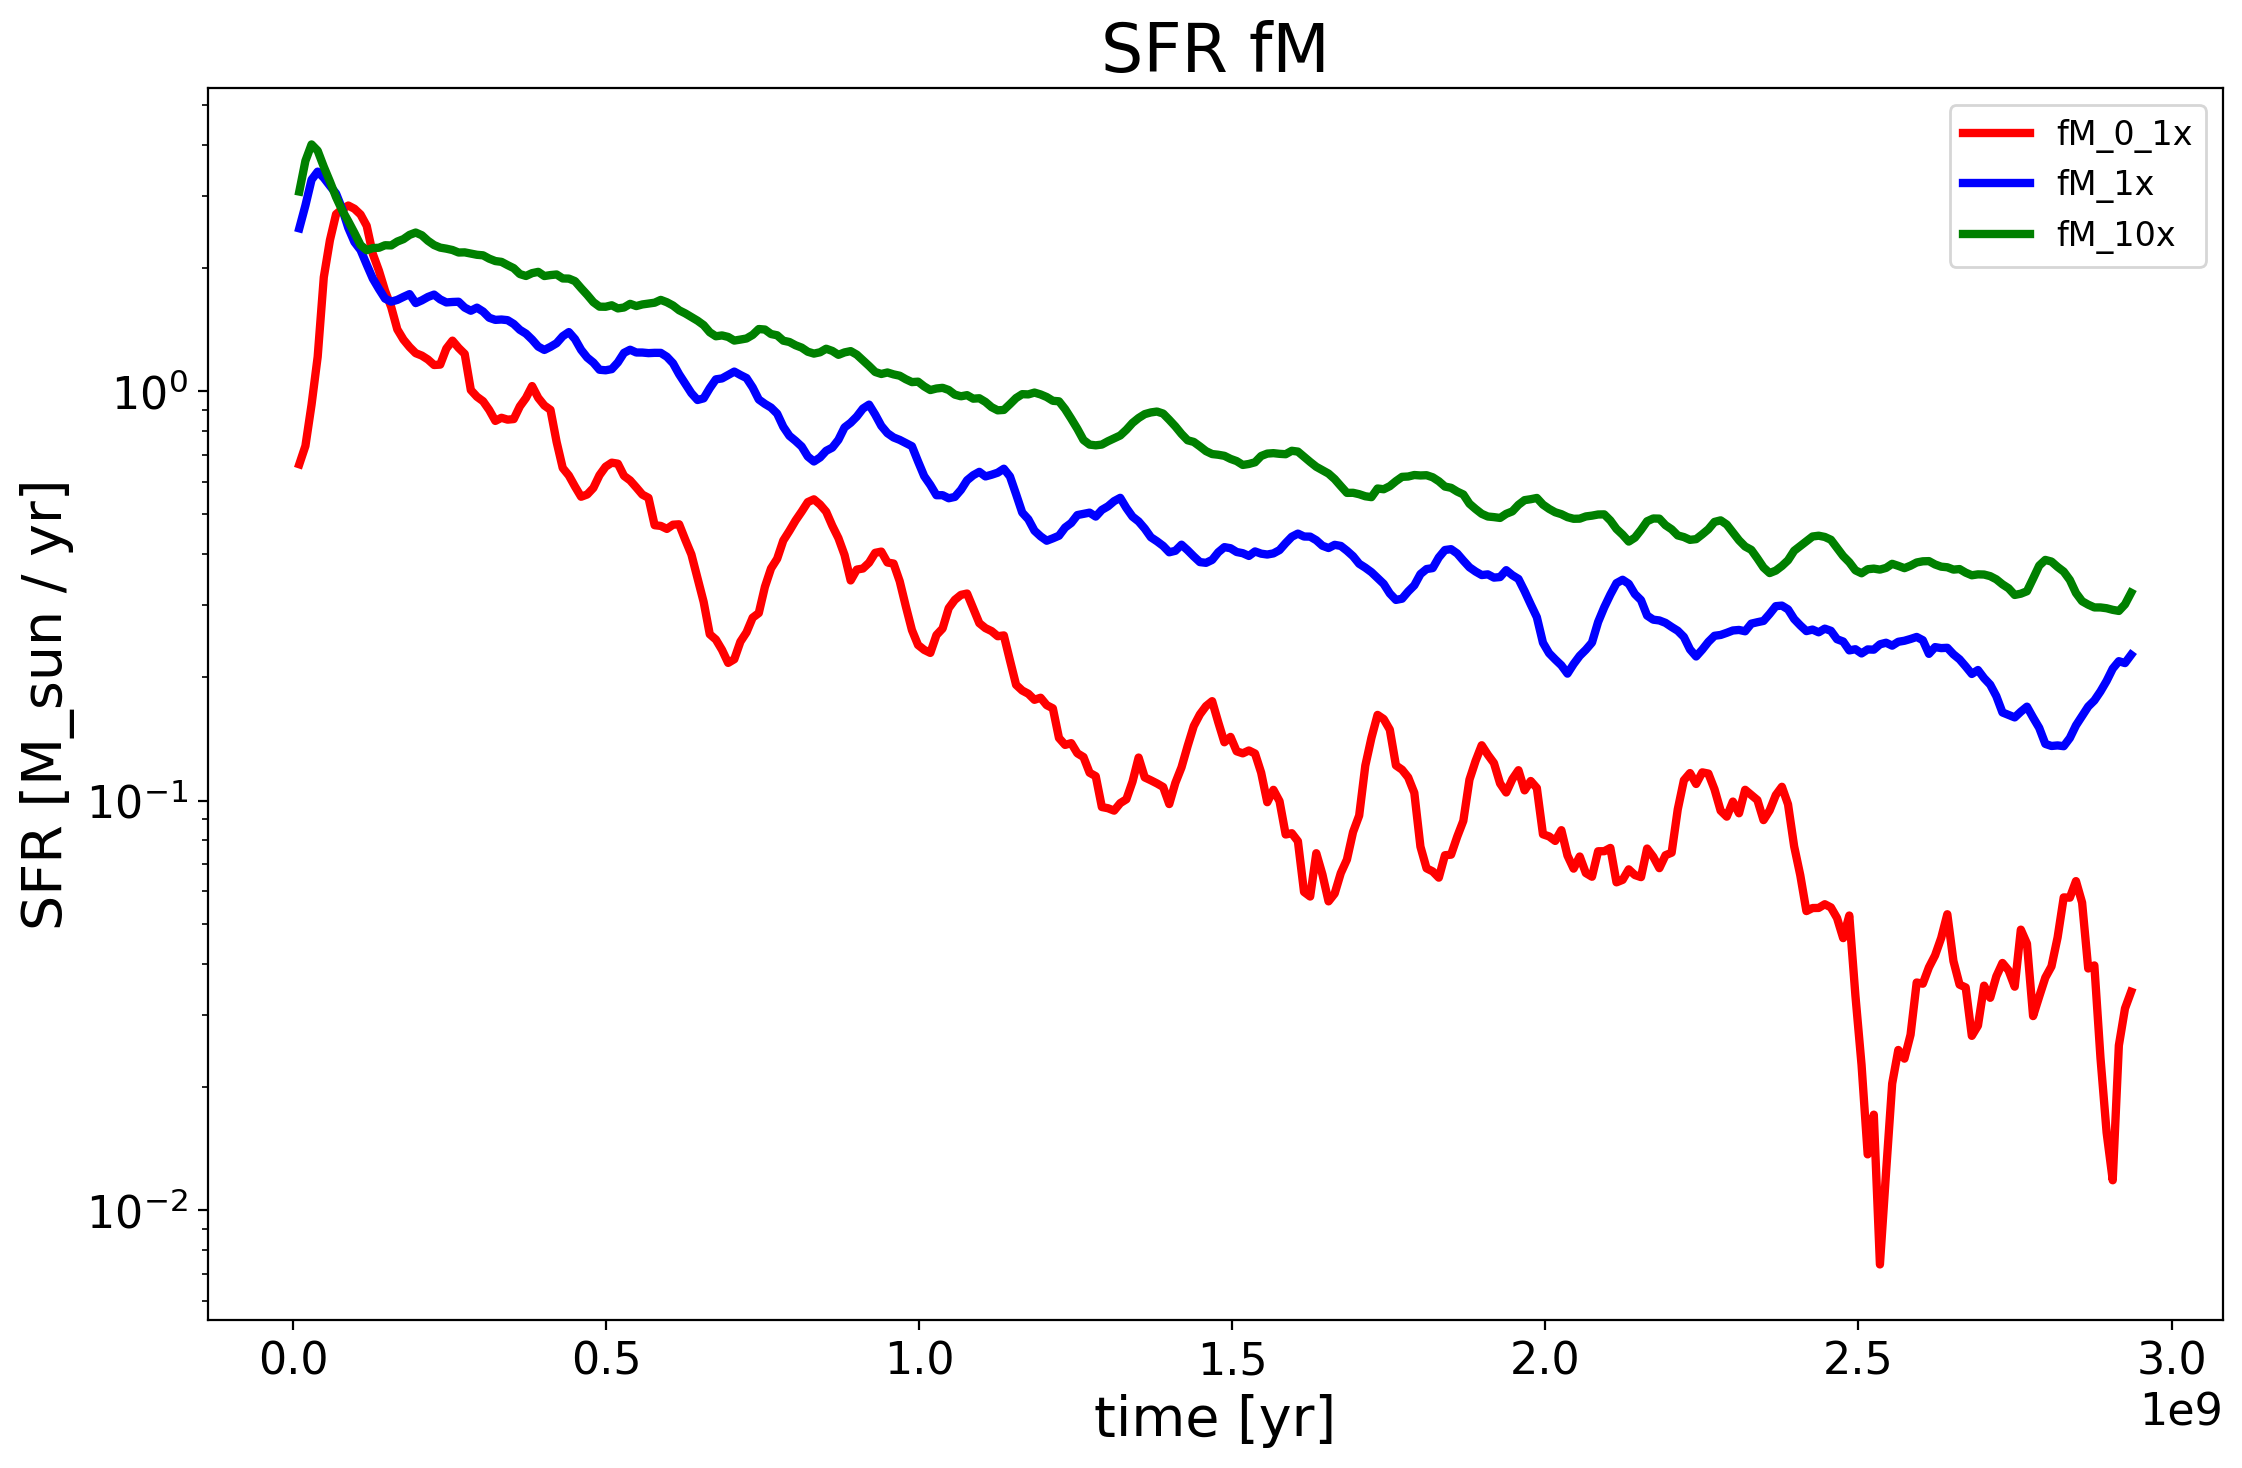

In [26]:
sfrArray = np.full((len(galaxyFolderNames), galaxyFrameAmount), 0, dtype = np.float64)

for i in range(len(galaxyFolderNames)):
    sfrArray[i] = clp.calculateOrLoadData(folder = galaxyDataFolders[i], 
                                        folderName = galaxyFolderNames[i], 
                                        dataName = "SFR", 
                                        calcDataOfOneSnapShotFunction = clp.getTotalSFR, 
                                        frameAmount = galaxyFrameAmount, 
                                        recalculate = False)



clp.PlotData(data = sfrArray, 
         folderNames = galaxyFolderNames, 
         title = "SFR fM", 
         ylabel = "SFR [M_sun / yr]", 
         dataName = "SFR", 
         unit_conversion_factor = 1,
         frameAmount = galaxyFrameAmount, 
         frameNbrMultiplier = galaxyFrameNbrMultiplier,
         TimeBetSnapshot_in_unit_time = TimeBetSnapshot_in_unit_time,
         compareToAnalyticRadius = False)

load data
load data
load data
[0.00000000e+00 9.78462075e+06 1.95692415e+07 2.93538623e+07
 3.91384830e+07 4.89231038e+07 5.87077245e+07 6.84923453e+07
 7.82769660e+07 8.80615868e+07 9.78462075e+07 1.07630828e+08
 1.17415449e+08 1.27200070e+08 1.36984691e+08 1.46769311e+08
 1.56553932e+08 1.66338553e+08 1.76123174e+08 1.85907794e+08
 1.95692415e+08 2.05477036e+08 2.15261657e+08 2.25046277e+08
 2.34830898e+08 2.44615519e+08 2.54400140e+08 2.64184760e+08
 2.73969381e+08 2.83754002e+08 2.93538623e+08 3.03323243e+08
 3.13107864e+08 3.22892485e+08 3.32677106e+08 3.42461726e+08
 3.52246347e+08 3.62030968e+08 3.71815589e+08 3.81600209e+08
 3.91384830e+08 4.01169451e+08 4.10954072e+08 4.20738692e+08
 4.30523313e+08 4.40307934e+08 4.50092555e+08 4.59877175e+08
 4.69661796e+08 4.79446417e+08 4.89231038e+08 4.99015658e+08
 5.08800279e+08 5.18584900e+08 5.28369521e+08 5.38154141e+08
 5.47938762e+08 5.57723383e+08 5.67508004e+08 5.77292624e+08
 5.87077245e+08 5.96861866e+08 6.06646487e+08 6.1643110

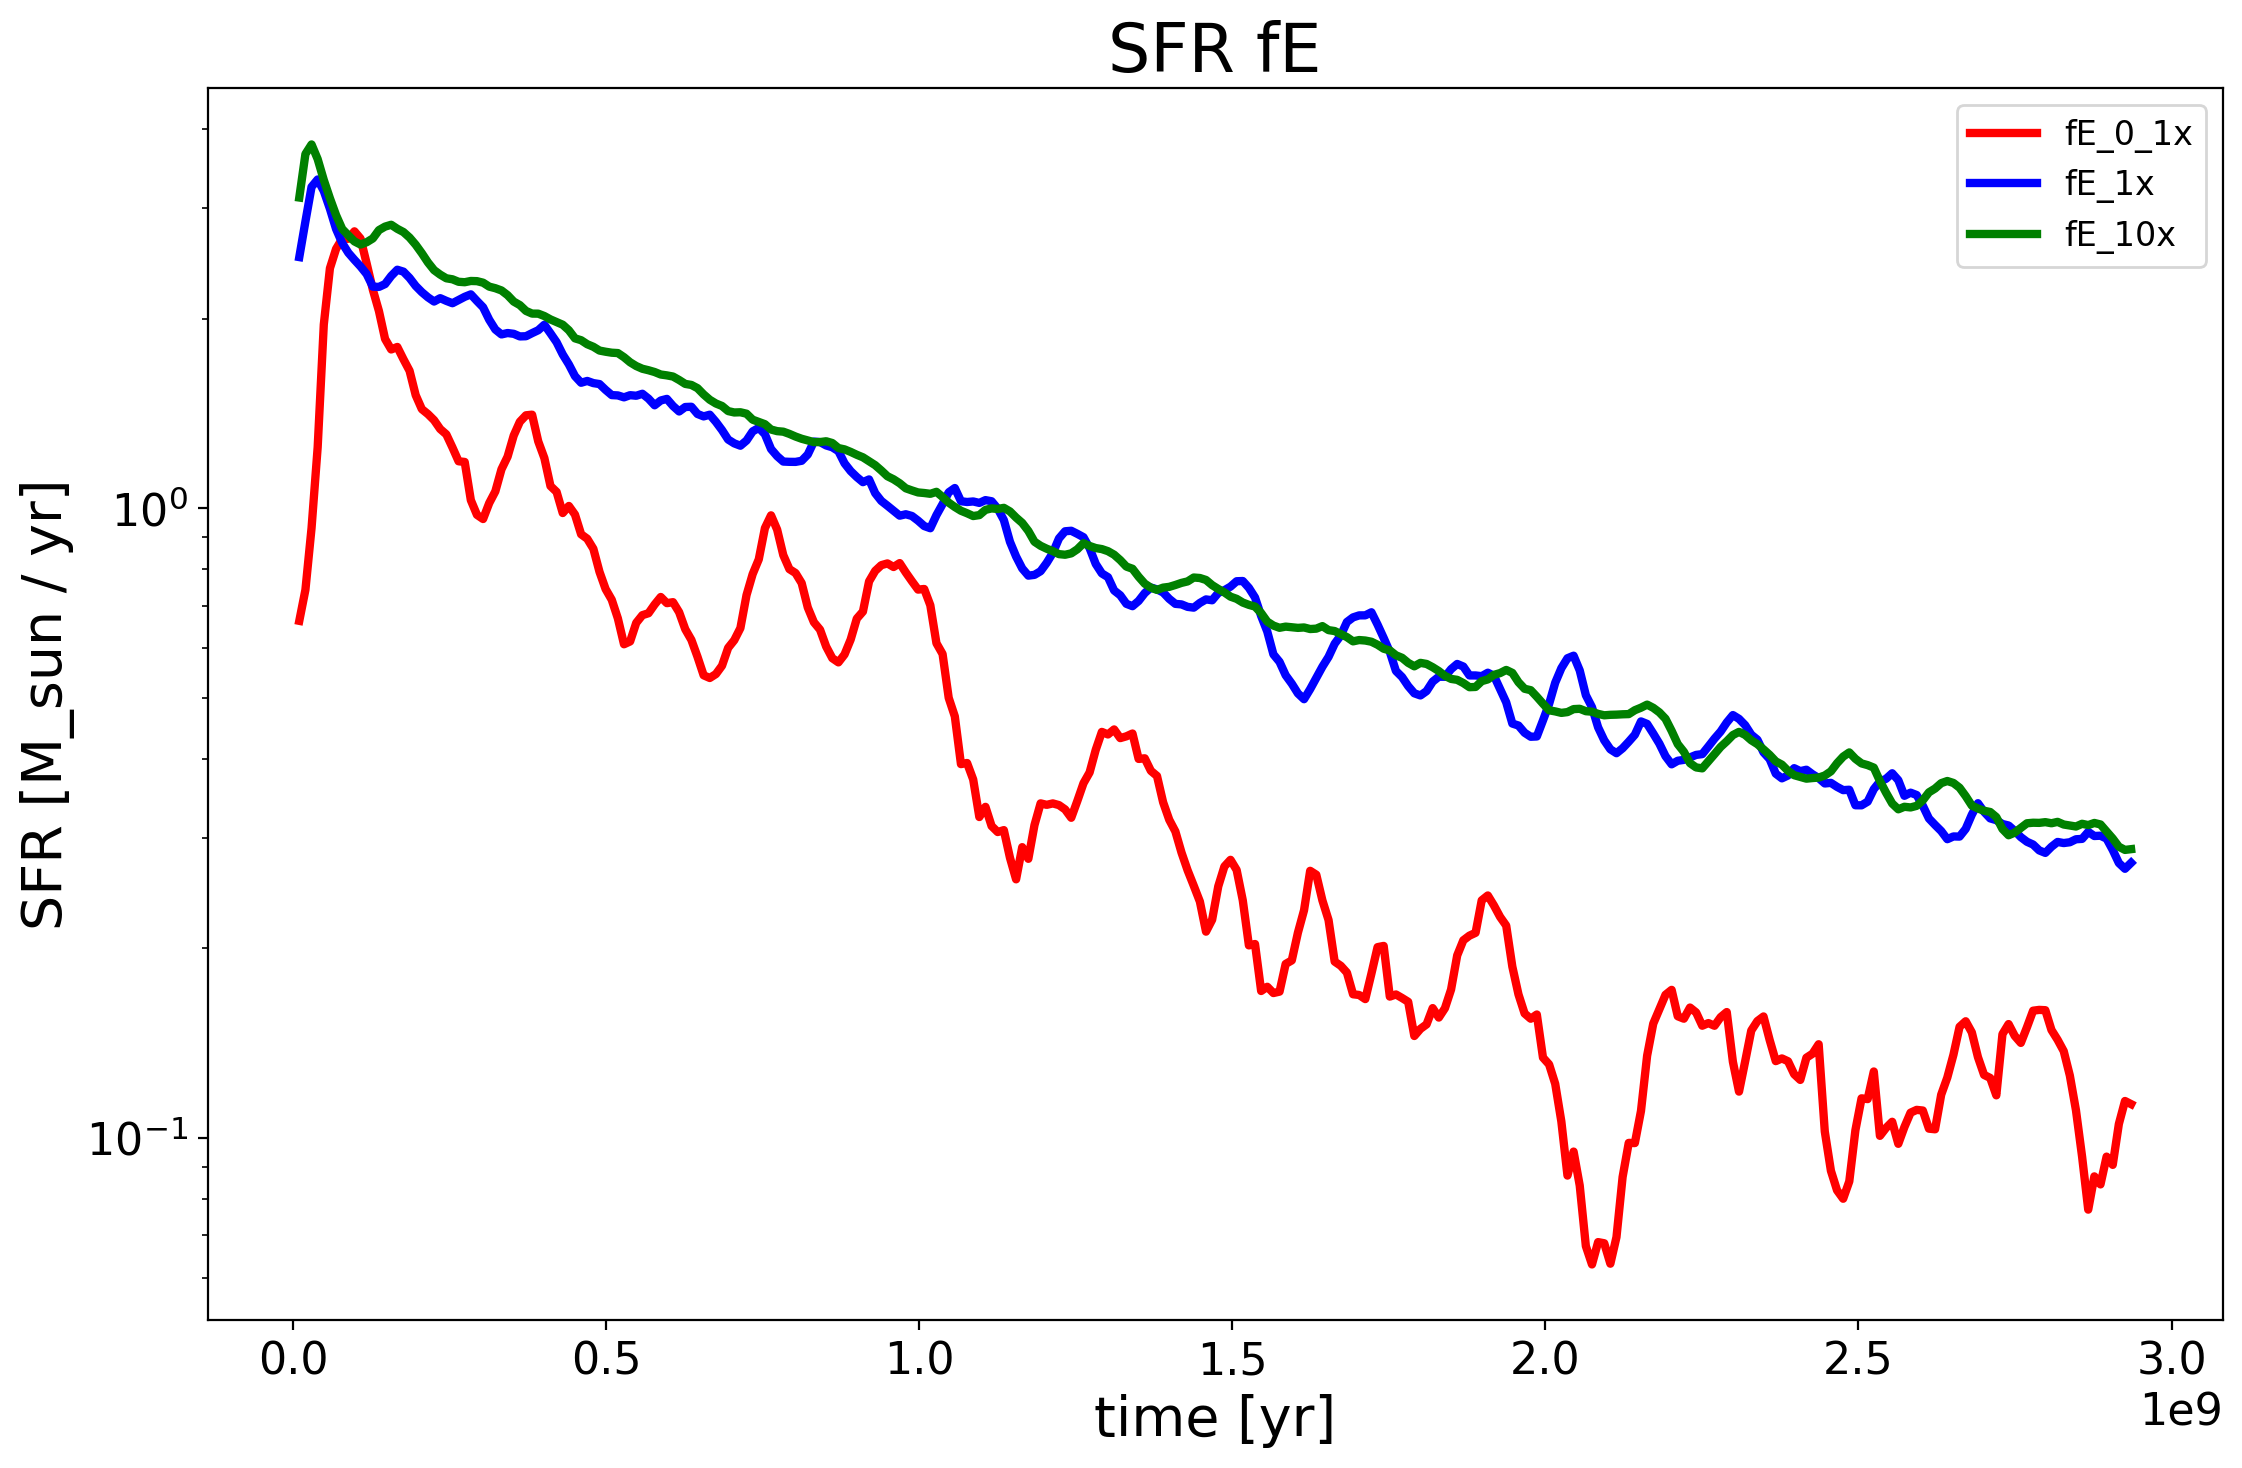

In [28]:
sfrArray = np.full((len(galaxyFolderNames), galaxyFrameAmount), 0, dtype = np.float64)

for i in range(len(galaxyFolderNames)):
    sfrArray[i] = clp.calculateOrLoadData(folder = galaxyDataFolders[i], 
                                        folderName = galaxyFolderNames[i], 
                                        dataName = "SFR", 
                                        calcDataOfOneSnapShotFunction = clp.getTotalSFR, 
                                        frameAmount = galaxyFrameAmount, 
                                        recalculate = False)



clp.PlotData(data = sfrArray, 
         folderNames = galaxyFolderNames, 
         title = "SFR fE", 
         ylabel = "SFR [M_sun / yr]", 
         dataName = "SFR", 
         unit_conversion_factor = 1,
         frameAmount = galaxyFrameAmount, 
         frameNbrMultiplier = galaxyFrameNbrMultiplier,
         TimeBetSnapshot_in_unit_time = TimeBetSnapshot_in_unit_time,
         compareToAnalyticRadius = False)

In [4]:
sfrArray = np.full((len(galaxyFolderNames), galaxyFrameAmount), 0, dtype = np.float64)

for i in range(len(galaxyFolderNames)):
    sfrArray[i] = clp.calculateOrLoadData(folder = galaxyDataFolders[i], 
                                        folderName = galaxyFolderNames[i], 
                                        dataName = "SFR", 
                                        calcDataOfOneSnapShotFunction = clp.getTotalSFR, 
                                        frameAmount = galaxyFrameAmount, 
                                        recalculate = False)



clp.PlotData(data = sfrArray, 
         folderNames = galaxyFolderNames, 
         title = "SFR over Time", 
         ylabel = "SFR [M_sun / yr]", 
         dataName = "SFR", 
         unit_conversion_factor = 1,
         frameAmount = galaxyFrameAmount, 
         frameNbrMultiplier = galaxyFrameNbrMultiplier,
         TimeBetSnapshot_in_unit_time = TimeBetSnapshot_in_unit_time,
         compareToAnalyticRadius = False)

load data
load data
load data
[0.00000000e+00 9.78462075e+06 1.95692415e+07 2.93538623e+07
 3.91384830e+07 4.89231038e+07 5.87077245e+07 6.84923453e+07
 7.82769660e+07 8.80615868e+07 9.78462075e+07 1.07630828e+08
 1.17415449e+08 1.27200070e+08 1.36984691e+08 1.46769311e+08
 1.56553932e+08 1.66338553e+08 1.76123174e+08 1.85907794e+08
 1.95692415e+08 2.05477036e+08 2.15261657e+08 2.25046277e+08
 2.34830898e+08 2.44615519e+08 2.54400140e+08 2.64184760e+08
 2.73969381e+08 2.83754002e+08 2.93538623e+08 3.03323243e+08
 3.13107864e+08 3.22892485e+08 3.32677106e+08 3.42461726e+08
 3.52246347e+08 3.62030968e+08 3.71815589e+08 3.81600209e+08
 3.91384830e+08 4.01169451e+08 4.10954072e+08 4.20738692e+08
 4.30523313e+08 4.40307934e+08 4.50092555e+08 4.59877175e+08
 4.69661796e+08 4.79446417e+08 4.89231038e+08 4.99015658e+08
 5.08800279e+08 5.18584900e+08 5.28369521e+08 5.38154141e+08
 5.47938762e+08 5.57723383e+08 5.67508004e+08 5.77292624e+08
 5.87077245e+08 5.96861866e+08 6.06646487e+08 6.1643110

### Stars Exploded vs Time

#### Total #SN

load data
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
load data
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

/vera/u/xboecker/arepo/jupyterNotebooks/CalcLoadPlotData.py:461: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  plt.yscale("log")


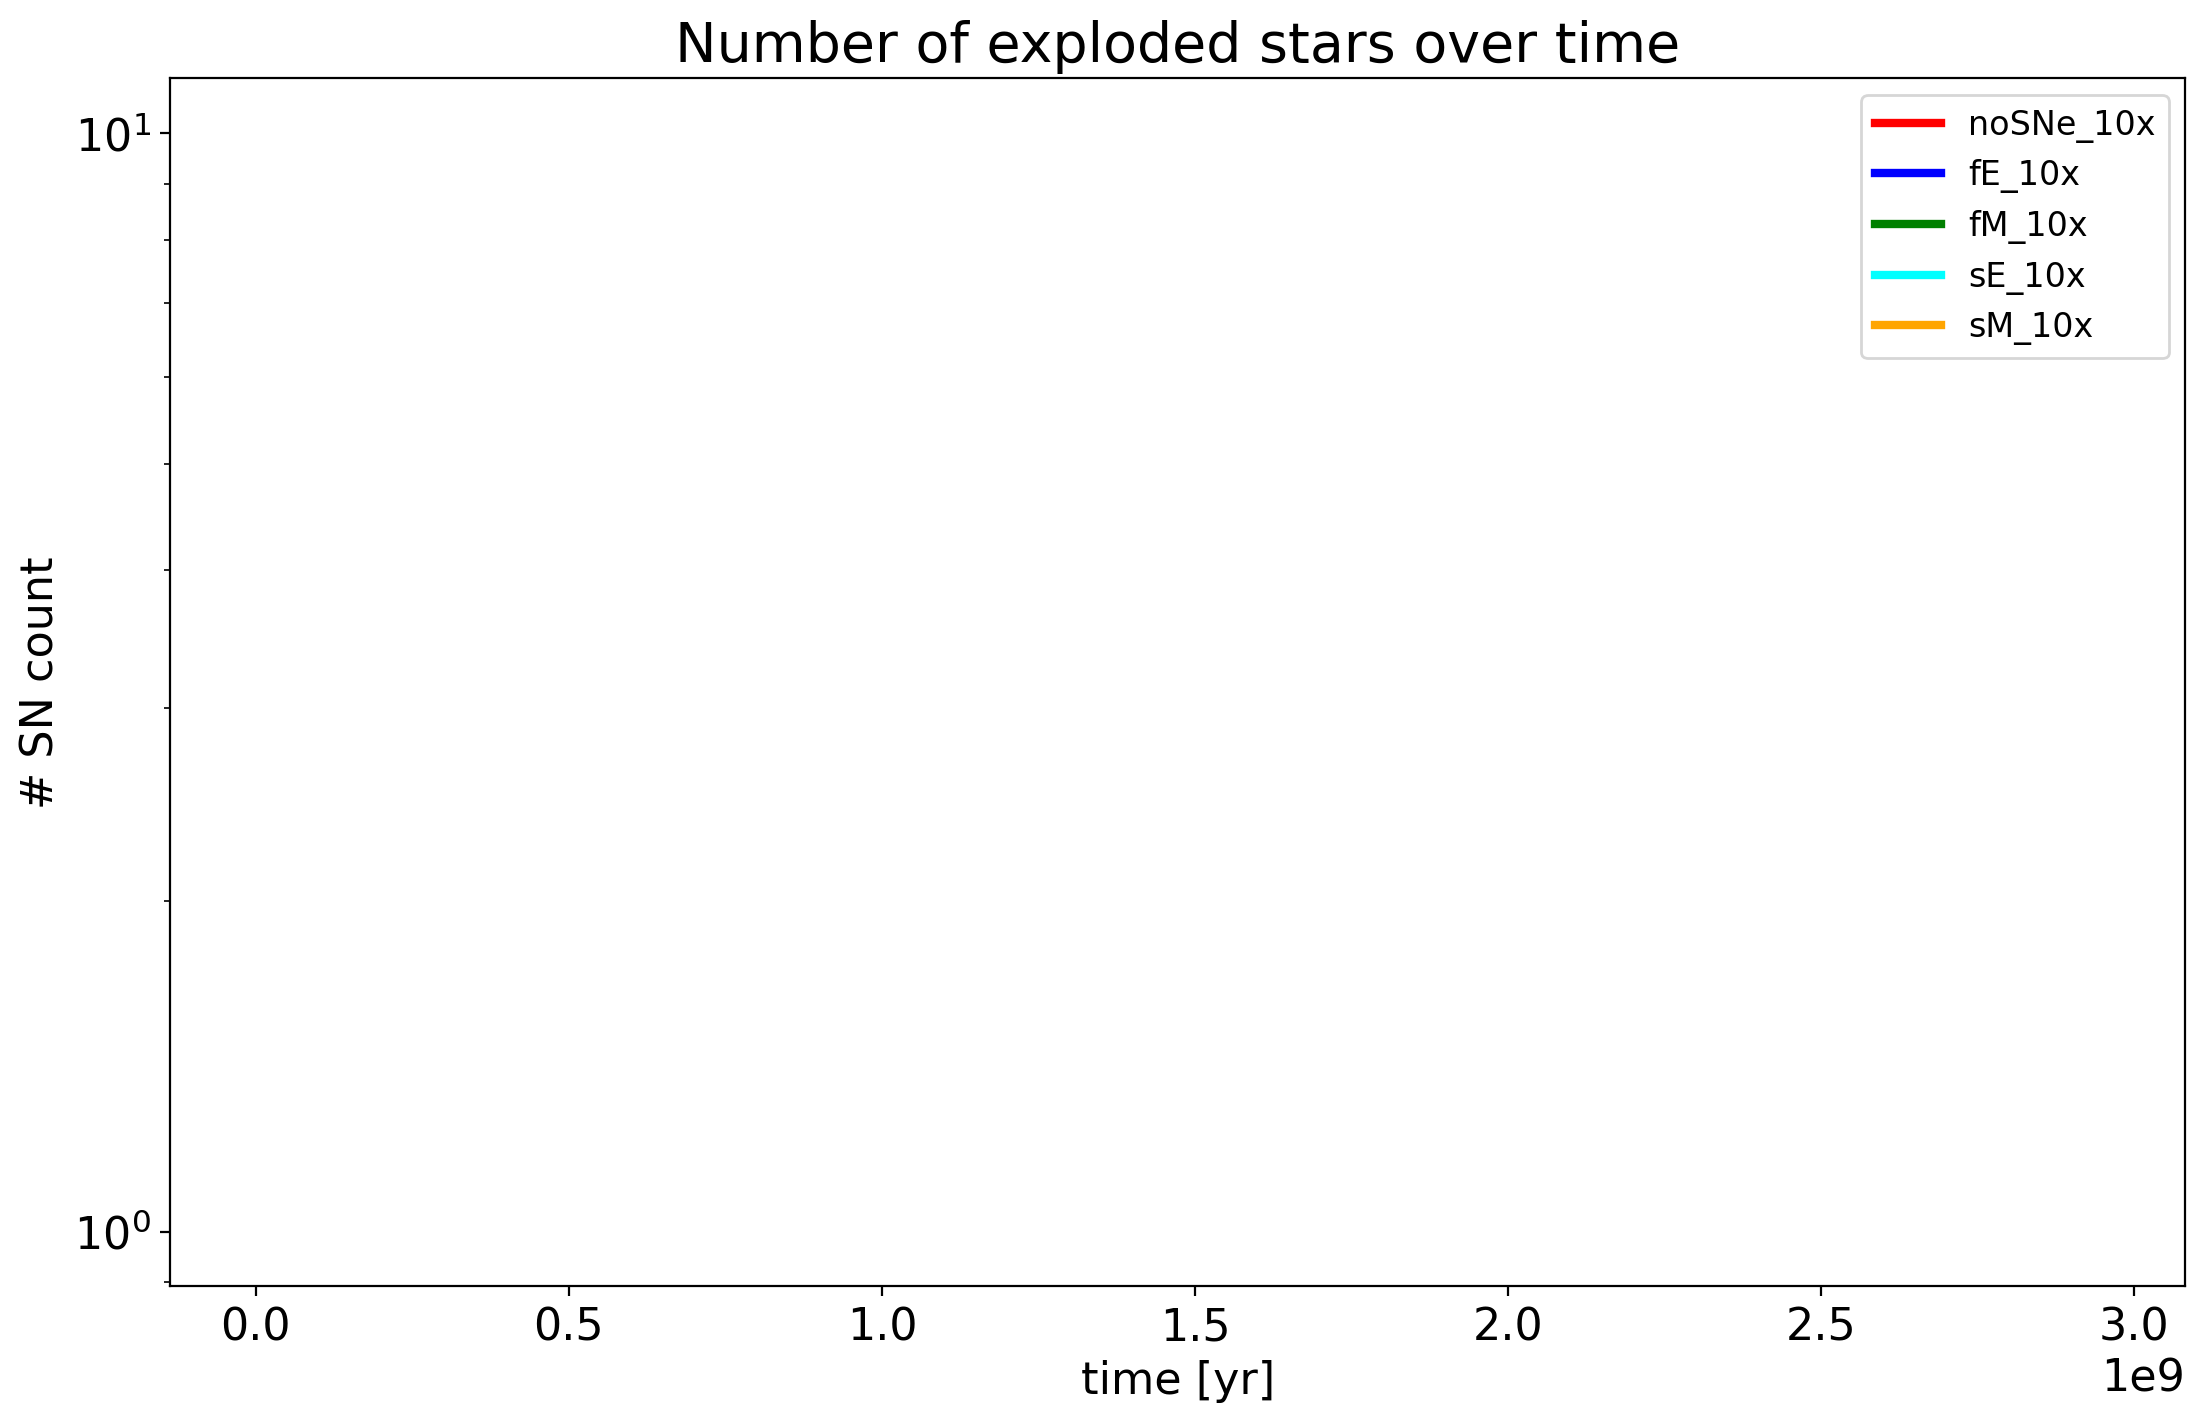

In [17]:
dataArray = np.full((len(galaxyFolderNames), galaxyFrameAmount), 0, dtype = np.float64)

for i in range(len(galaxyFolderNames)):
    dataArray[i] = clp.calculateOrLoadData(folder = galaxyDataFolders[i], 
                                        folderName = galaxyFolderNames[i], 
                                        dataName = "totalStarsExploded", 
                                        calcDataOfOneSnapShotFunction = clp.getTotalStarsExploded, 
                                        frameAmount = galaxyFrameAmount, 
                                        recalculate = False)
    print(dataArray[i])

#print(dataArray)

clp.PlotData(data = dataArray, 
         folderNames = galaxyFolderNames, 
         title = "Number of exploded stars over time", 
         ylabel = "# SN count", 
         dataName = "totalStarsExploded", 
         unit_conversion_factor = 1,
         frameAmount = galaxyFrameAmount, 
         frameNbrMultiplier = galaxyFrameNbrMultiplier,
         TimeBetSnapshot_in_unit_time = TimeBetSnapshot_in_unit_time,
         compareToAnalyticRadius = False)

#### SN rate

calculate data


300

load data
load data
load data
load data


/vera/u/xboecker/arepo/jupyterNotebooks/CalcLoadPlotData.py:461: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  plt.yscale("log")


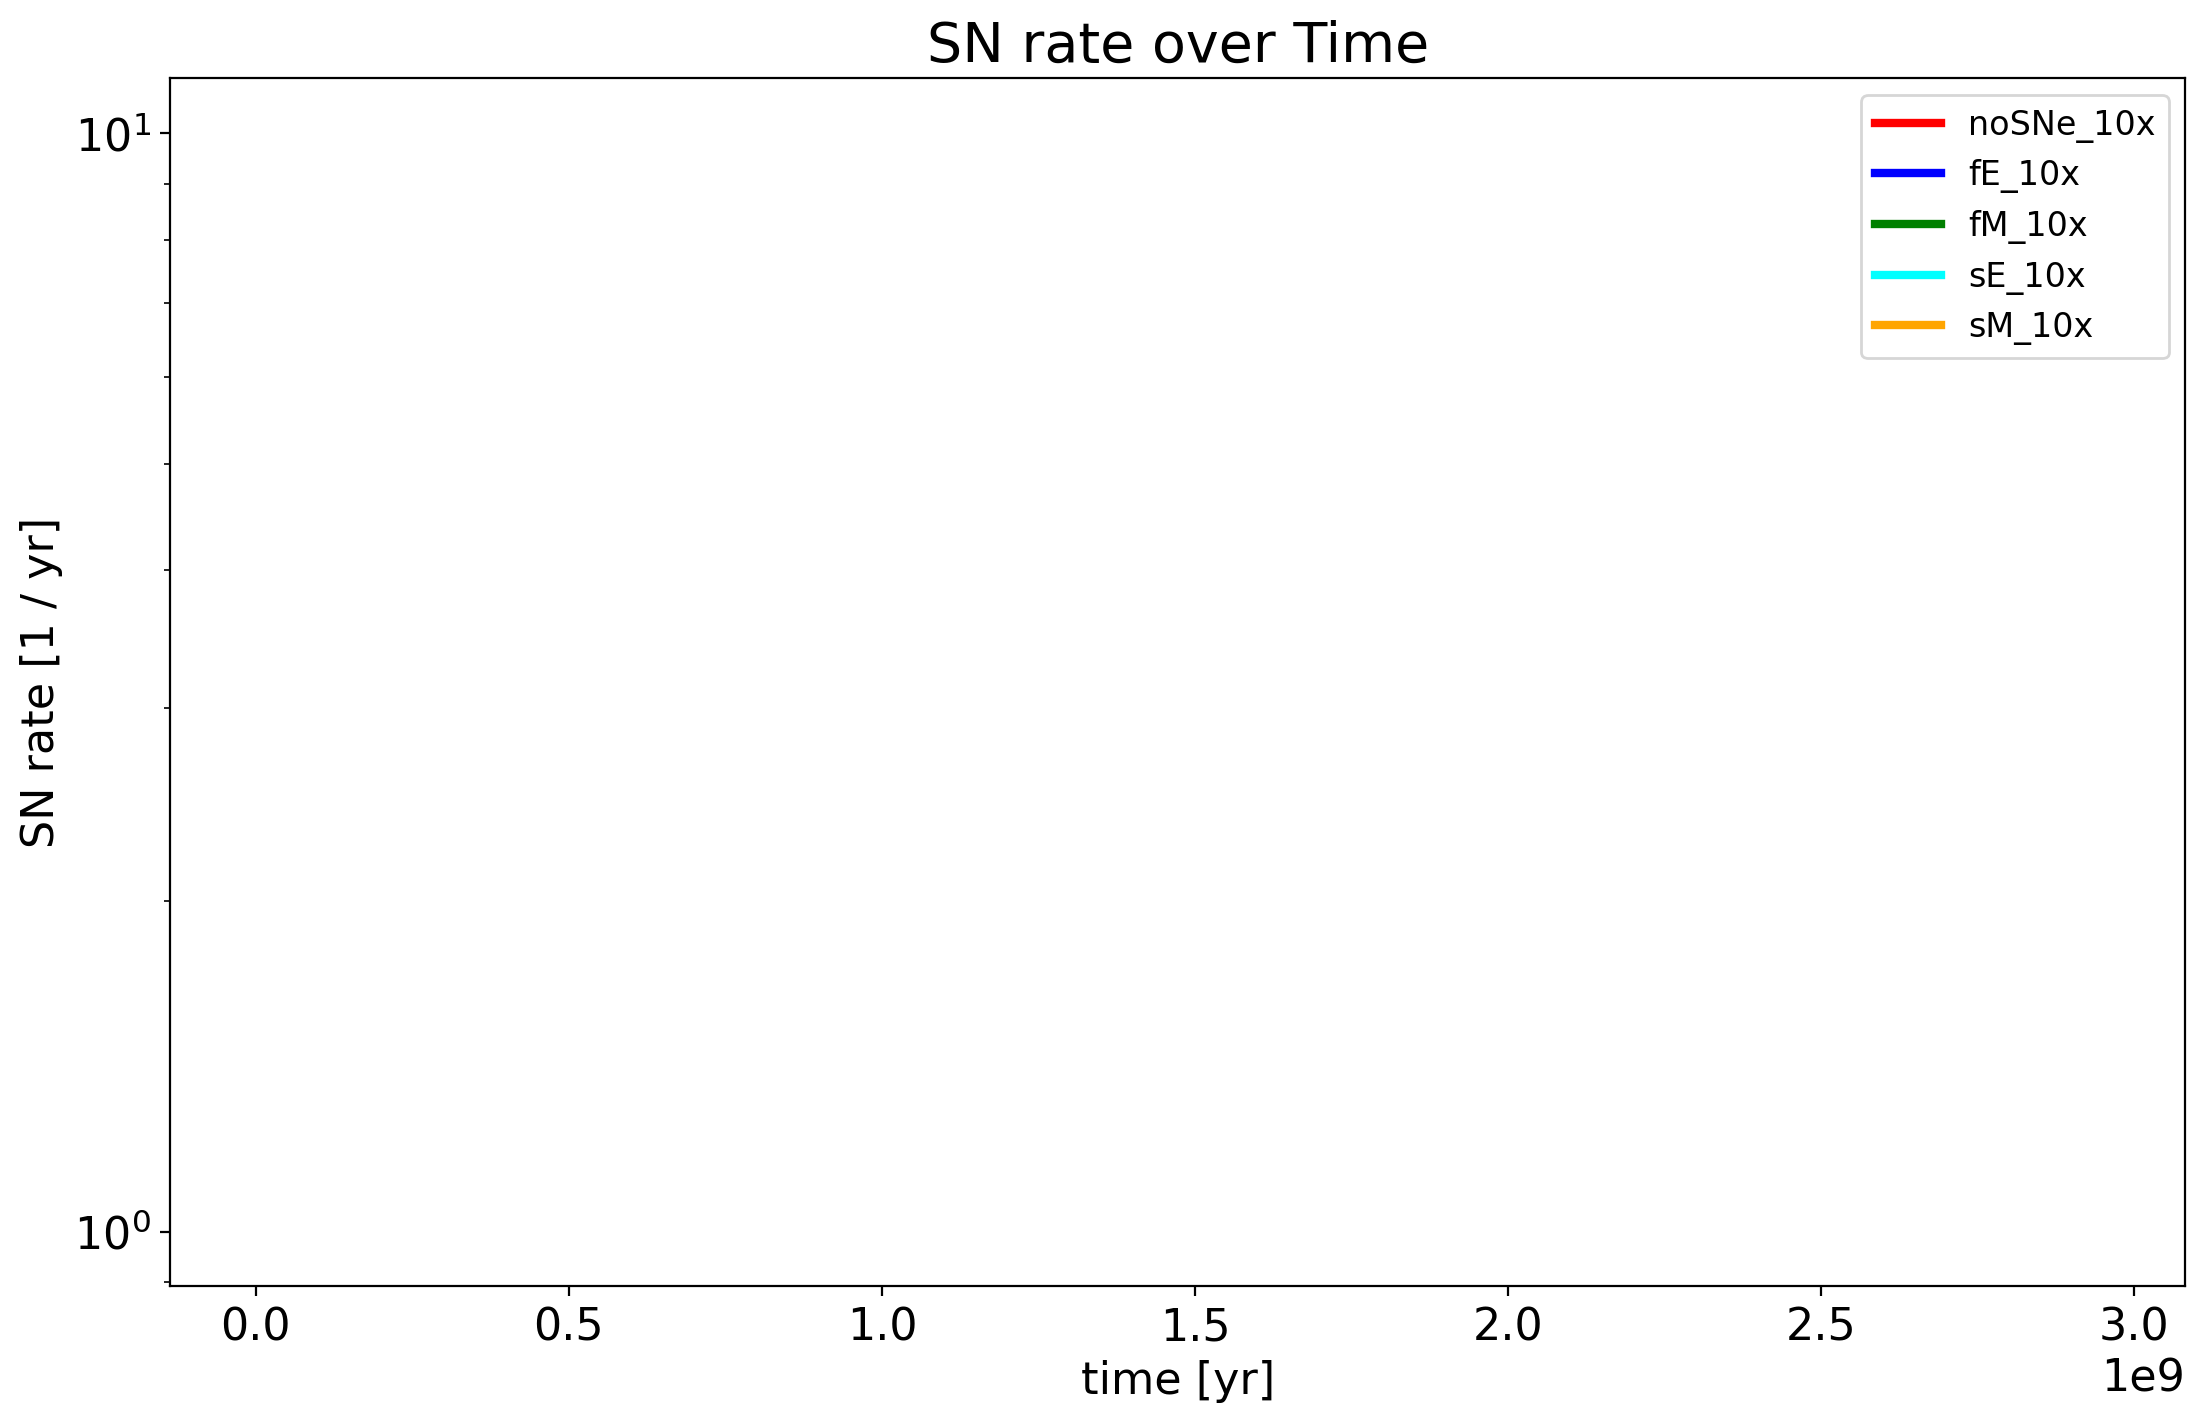

In [16]:
dataArray = np.full((len(galaxyFolderNames), galaxyFrameAmount), 0, dtype = np.float64)

for i in range(len(galaxyFolderNames)):
    dataArray[i] = clp.calculateOrLoadData(folder = galaxyDataFolders[i], 
                                        folderName = galaxyFolderNames[i], 
                                        dataName = "starsExplodedThisTimeStep", 
                                        calcDataOfOneSnapShotFunction = clp.getStarsExplodedThisTimeStep, 
                                        frameAmount = galaxyFrameAmount, 
                                        recalculate = False)



clp.PlotData(data = dataArray, 
         folderNames = galaxyFolderNames, 
         title = "SN rate over Time", 
         ylabel = "SN rate [1 / yr]", 
         dataName = "starsExplodedThisTimeStep", 
         unit_conversion_factor = 1 / TimeBetSnapshot_in_unit_time / UnitTime_in_yr,
         frameAmount = galaxyFrameAmount, 
         frameNbrMultiplier = galaxyFrameNbrMultiplier,
         TimeBetSnapshot_in_unit_time = TimeBetSnapshot_in_unit_time,
         compareToAnalyticRadius = False)

### Phase Diagram (Density, Temperature)

In [30]:
kB_SI = 1.38e-23 #J/K
kB_cgs = kB_SI * 1e7
X_H = 0.76 # hydrogen mass fraction
gamma = 5/3
m_p = 1.67e-24 # proton mass in g

def T(internalEnergy, electronAbundance): #input in codeunits output in Kelvin
    x_e = electronAbundance
    u = internalEnergy
    
    print(x_e)
    my = 4/(1 + 3 * X_H + 4 * X_H * x_e) * m_p # meanMolecularWeight
    T = (gamma - 1) * u / kB_cgs * UnitEnergy_in_erg / UnitMass_in_g * my
    return T

def getTemperaturesInKelvin(folder, timeStep, debugOn = False):
    energies = clp.LoadDataFromHDF(folder, timeStep, "InternalEnergy")
    electronAbundance = clp.LoadDataFromHDF(folder, timeStep, "ElectronAbundance")
    
    temperatures = T(energies, electronAbundance)
    
    if(timeStep == 0):
        print("initial temperature: " + str(temperatures[0]) + "K")
    if(debugOn):
        print("max temp: " + str(np.max(temperatures)))
        print("min temp: " + str(np.min(temperatures)))
    
    return temperatures

def PlotDensityTempPhaseDiagramm(folder, timeStep, galaxyBoxSize, savePath):
    densities = clp.getDensities(folder, timeStep)*UnitDensity_in_cgs /m_p
    temperatures = getTemperaturesInKelvin(folder, timeStep)
    masses = clp.getMasses(folder, timeStep)
    radDistances = clp.getRadialDistances(folder, timeStep, galaxyBoxSize) * UnitLength_in_kpc
    diskDensities = clp.densities[np.where(radDistances < 20)]
    diskTemperatures = temperatures[np.where(radDistances < 20)]

    print(np.min(densities))
    print(np.max(densities))
    print(np.min(temperatures))
    print(np.max(temperatures))
    fig, ax = plt.subplots(1,1, figsize=(13,8))
    
    ax.hist2d(np.log10(densities), np.log10(temperatures), weights=masses, bins=50, norm = mpl.colors.LogNorm(), range=[[-8,1],[0,9]])
    ax.set_xlabel("density [cm-3]")
    ax.set_ylabel("temperature [K]")
    filename = savePath + 'frame_%03d.png' % timeStep
    fig.savefig(filename)
    plt.show()
    plt.close(fig)
    

In [31]:
savePath = "/vera/u/xboecker/jupyterNotebooksOutputs/plots/Galaxy/phaseDiagrams/"
saveFolders = ["fE_10x/"]

PlotDensityTempPhaseDiagramm(galaxyDataFolders[1], 300, galaxyBoxSize, savePath + saveFolders[0])


#for f in range(len(galaxyFolderNames)-1):
#    dh = display(0,display_id=True)
#    for i in range(galaxyFrameAmount):
#        clp.PlotDensityTempPhaseDiagramm(galaxyDataFolders[f], i, galaxyBoxSize, savePath + saveFolders[f])
#        dh.update(i)
#

None


TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'

In [7]:
def plotZMeanValueProfile(folder, timeStep, loadValuesFunction, n_bins, yMin, yMax, scaleFactor, logScaleType, yLabel, savePath):
    # Define position and velocity data
    coos = clp.getCoos(folder, timeStep)[:,2]
    values = loadValuesFunction(folder, timeStep) * scaleFactor
    
    # Create the histogram
    n, bins, patches = plt.hist(coos, bins=n_bins, weights=values, histtype='bar', color='g')

    plt.clf()
    
    plt.figure(figsize=(10, 6), dpi=300)
    
    if(logScaleType == 1):
        plt.yscale("log")
    elif(logScaleType == 2):
        plt.yscale('symlog', linthresh=1)
    
    # Calculate the mean velocity for each bin
    bin_means = np.divide(n, np.histogram(coos, bins=n_bins)[0])
    

    # Plot the mean velocity on the y-axis
    plt.bar(bins[:-1], bin_means, width=np.diff(bins), align='edge', edgecolor='black', alpha=0.5)

    # Add labels to the axes
    plt.title("Time Step: {}".format(timeStep))
    plt.xlabel('z-Position (kpc)')
    plt.ylabel(yLabel)
    
    plt.xlim(0,galaxyBoxSize)
    plt.ylim(yMin, yMax)
    

    # Show the plot
    #plt.show()
    
    plt.savefig(savePath + 'frame_%03d.png' % timeStep)

In [9]:
from tqdm import tqdm

folder = galaxyDataFolders[0]
n_bins = 101
yMin = 1e3
yMax = 3.5e6
yLabel = "Mean Temp [K]"
savePath = "/vera/u/xboecker/jupyterNotebooksOutputs/plots/Galaxy/SFR_Cooling_XenoSN/zProfiles/zMeanTempProfiles100x_zOutflow/"
scaleFactor = 1
logScaleType = 1
getValuesFct = clp.getTemperaturesInKelvin

for i in tqdm(range(galaxyFrameAmount)):
    plotZMeanValueProfile(folder, i, getValuesFct, n_bins, yMin, yMax, scaleFactor, logScaleType, yLabel, savePath)

  0%|                                                   | 0/301 [00:00<?, ?it/s]

initial temperature: 10712.773473470237K


/tmp/ipykernel_68042/223130024.py:19: RuntimeWarning: invalid value encountered in true_divide
  bin_means = np.divide(n, np.histogram(coos, bins=n_bins)[0])
100%|█████████████████████████████████████████| 301/301 [04:11<00:00,  1.20it/s]


In [8]:
from tqdm import tqdm
plt.ioff()

folder = galaxyDataFolders[0]
n_bins = 101
yMin = -500
yMax = 500
yLabel = "Mean Velocity [km/s]"
savePath = "/vera/u/xboecker/jupyterNotebooksOutputs/plots/Galaxy/SFR_Cooling_XenoSN/zProfiles/zMeanVelProfiles100x_zOutflow/"
scaleFactor = UnitVelocity_in_km_per_s
logScaleType = 2
getValuesFct = clp.getZVelocities

for i in tqdm(range(galaxyFrameAmount)):
    plotZMeanValueProfile(folder, i, getValuesFct, n_bins, yMin, yMax, scaleFactor, logScaleType, yLabel, savePath)

  0%|                                                   | 0/301 [00:00<?, ?it/s]/tmp/ipykernel_68042/223130024.py:19: RuntimeWarning: invalid value encountered in true_divide
  bin_means = np.divide(n, np.histogram(coos, bins=n_bins)[0])
  6%|██▋                                       | 19/301 [00:14<03:30,  1.34it/s]/tmp/ipykernel_68042/223130024.py:11: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(10, 6), dpi=300)
100%|█████████████████████████████████████████| 301/301 [03:41<00:00,  1.36it/s]


In [10]:
from tqdm import tqdm

folder = galaxyDataFolders[0]
n_bins = 101
yMin = 1e-8
yMax = 1.5e-1
yLabel = "Mean Density [cm-3]"
savePath = "/vera/u/xboecker/jupyterNotebooksOutputs/plots/Galaxy/SFR_Cooling_XenoSN/zProfiles/zMeanDensityProfiles100x_zOutflow/"
scaleFactor = UnitDensity_in_cgs / m_p
logScaleType = 1
getValuesFct = clp.getDensities

for i in tqdm(range(galaxyFrameAmount)):
    plotZMeanValueProfile(folder, i, getValuesFct, n_bins, yMin, yMax, scaleFactor, logScaleType, yLabel, savePath)

  0%|                                                   | 0/301 [00:00<?, ?it/s]/tmp/ipykernel_68042/223130024.py:19: RuntimeWarning: invalid value encountered in true_divide
  bin_means = np.divide(n, np.histogram(coos, bins=n_bins)[0])
100%|█████████████████████████████████████████| 301/301 [04:26<00:00,  1.13it/s]


In [36]:
import matplotlib.pyplot as plt
import numpy as np

#path = "/vera/u/xboecker/jupyterNotebooksOutputs/plots/Galaxy/movies/noRefinement_noOutflow_ICs_runs/sE_10x_new_boost_10/"
#path = "/vera/u/xboecker/jupyterNotebooksOutputs/plots/"

imgNames = ["SFR-fE_0_1x-fE_1x-fE_10x.png", "SFR-fM_0_1x-fM_1x-fM_10x.png", "SFR-sE_0_1x_new_boost_10-sE_1x_new_boost_10-sE_10x_new_boost_10.png", "SFR-sM_0_1x_new_boost_10-sM_1x_new_boost_10-sM_10x_new_boost_10.png"]
# Define the figure and subplot layout
fig, axs = plt.subplots(nrows=2, ncols=2, dpi=300, figsize=(12.9,18.4))

#plt.style.use('./my_style.mplstyle')
plt.style.use('default')

# Load and display the PNG images on each subplot
for i, ax in enumerate(axs.flatten()):
    
    #img = plt.imread(path + 'frame_%03d.png' % (i*300/7))
    img = plt.imread(path + imgNames[i])
    ax.imshow(img)
    #ax.set_title(f't = { format(i*3/7, ".2f")} Gyr', y=0)
    ax.axis('off')  # Turn off the axis labels

# Adjust the spacing and display the figure
#plt.tight_layout()
plt.subplots_adjust(hspace=-0.65, wspace=0)
plt.savefig("/vera/u/xboecker/jupyterNotebooksOutputs/plots/SFR_resolution_comparison.png")
plt.show()